In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import copy
import csv
import glob
import sklearn.metrics as sm

In [2]:
#定义函数获取mape
def mape(yyy_true,yyy_pred):
    return np.mean(np.abs((yyy_pred-yyy_true)/yyy_pred))*100

In [3]:
FePc_CO = './CO-FeP-water.csv'
data_sets = (pd.read_csv(FePc_CO)).values
print(data_sets.shape,data_sets[0,2:29])
# FePc_CO = np.random.permutation(FePc_CO)
bad_data_set = np.where(data_sets[:,2:28]<0)[0]
bad_data_set = np.unique(bad_data_set)
data_sets = np.delete(data_sets,bad_data_set,axis=0)  #删除描述符小于0的样本
FePc_CO = data_sets[:,:]
print(FePc_CO.shape)
#用固定随机种子打乱二维数组的行顺序
np.random.seed(1)
np.random.shuffle(FePc_CO) #  打乱数据的第一维度
print(FePc_CO[0,:])
data_sets = FePc_CO

(375, 33) [1.0631710e+02 3.7500000e-02 1.6067000e+00 1.2096880e+02 6.0400000e-02
 1.0170000e+00 1.8513360e+02 1.9717000e+00 3.1245000e+00 3.2458180e+02
 1.2710100e+01 1.6871000e+00 3.5199950e+02 9.5712000e+00 2.8620000e-01
 5.4923080e+02 7.9768000e+00 7.0191000e+00 5.5241580e+02 1.1305900e+01
 4.3898000e+00 6.1353660e+02 3.0382700e+01 5.4885000e+00 1.9294498e+03
 1.0850777e+03 9.2627800e+01]
(375, 33)
[ 6.70000000e+01  7.00000000e+01  1.15702100e+02  3.57000000e-02
  1.76730000e+00  1.31048100e+02  1.40400000e-01  1.37350000e+00
  1.83730000e+02  1.38360000e+00  5.13330000e+00  3.21120900e+02
  1.15992000e+01  1.61240000e+00  3.60361100e+02  9.77540000e+00
  6.95900000e-01  5.27415900e+02  1.35021000e+01  6.18370000e+00
  5.61739400e+02  3.28700000e+00  4.53800000e-01  6.05895800e+02
  3.34429000e+01  1.94710000e+00  1.86905260e+03  1.10336050e+03
  1.00106400e+02 -1.11458326e+01  1.71601600e+00  1.18242700e+00
  1.67108124e+02]


In [4]:
standar_scaler = preprocessing.StandardScaler()
x = FePc_CO[:,2:29]
y = FePc_CO[:,32].reshape(-1,1)
print(x[0,:])
print(y[0])
print(x.shape,y.shape)
x = standar_scaler.fit_transform(x)
data_sets = np.hstack((x,y))
print(data_sets[0,:])

[1.1570210e+02 3.5700000e-02 1.7673000e+00 1.3104810e+02 1.4040000e-01
 1.3735000e+00 1.8373000e+02 1.3836000e+00 5.1333000e+00 3.2112090e+02
 1.1599200e+01 1.6124000e+00 3.6036110e+02 9.7754000e+00 6.9590000e-01
 5.2741590e+02 1.3502100e+01 6.1837000e+00 5.6173940e+02 3.2870000e+00
 4.5380000e-01 6.0589580e+02 3.3442900e+01 1.9471000e+00 1.8690526e+03
 1.1033605e+03 1.0010640e+02]
[167.108124]
(375, 27) (375, 1)
[ 9.48913975e-01 -6.31179039e-01 -5.24537798e-02  1.36125786e+00
  7.83476010e-01 -5.36407899e-01 -3.28288794e-01 -2.01087962e-01
  2.27149356e-01  5.59119216e-03  8.95366484e-02  2.16392709e+00
  4.69592014e-01 -1.82192639e+00 -2.64062479e-01 -5.79830163e-01
  2.10538633e-01  1.75077020e+00  2.61331327e-01 -1.26763446e+00
 -1.38814520e+00 -5.09688016e-01  5.71135893e-02 -1.39009950e+00
 -1.15958694e+00 -6.97198965e-01 -3.22136756e-01  1.67108124e+02]


In [5]:
k_fold = 5
one_fold = int(data_sets.shape[0]/k_fold)
redundant = data_sets.shape[0] - one_fold*k_fold
print(one_fold,'       ',redundant)

75         0


In [6]:
data_sets_1 = data_sets[0:75,:]
data_sets_2 = data_sets[75:150,:]
data_sets_3 = data_sets[150:225,:]
data_sets_4 = data_sets[225:300,:]
data_sets_5 = data_sets[300:375,:]
print(data_sets_1.shape,data_sets_2.shape,data_sets_3.shape,data_sets_4.shape,data_sets_5.shape)
data_sets_new = np.vstack((data_sets_1,data_sets_2))
data_sets_new = np.vstack((data_sets_new,data_sets_3))
data_sets_new = np.vstack((data_sets_new,data_sets_4))
data_sets_new = np.vstack((data_sets_new,data_sets_5))
# print(data_sets_new.shape,data_sets_new[0,:])
print((data_sets == data_sets_new).all())

(75, 28) (75, 28) (75, 28) (75, 28) (75, 28)
True


In [7]:
data_sets_train = np.vstack((data_sets_2,data_sets_3))
data_sets_train = np.vstack((data_sets_train,data_sets_4))
data_sets_train = np.vstack((data_sets_train,data_sets_5))
data_sets_test  = data_sets_1
print(data_sets_train.shape,data_sets_test.shape)
x_train = data_sets_train[:,:-1]
y_train = data_sets_train[:,-1]
x_test = data_sets_test[:,:-1]
y_test = data_sets_test[:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(300, 28) (75, 28)
(300, 27) (300,) (75, 27) (75,)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(x_train.shape[1],),activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.03),name="layer1"),
#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.02),name="layer2"),
#     tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(32, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.01),name="layer3"),

    tf.keras.layers.Dense(1,name="layer4")
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               3584      
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer3 (Dense)               (None, 32)                2080      
_________________________________________________________________
layer4 (Dense)               (None, 1)                 33        
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________________________


In [9]:
#模型搭建好之后就会给每个参数赋予初值
layer0 = model.layers[0].get_weights()    #这里的layer0对应模型中name里面的layer1
# print(layer0[0].shape)       #权重
# print(layer0[1].shape)       #偏置
print(layer0[0][0,0],layer0[1][0])        #每次初始化的权重值都不一样
# print(layer0[1])   
# print(model.layers[1].get_weights)
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

-0.18529767 0.0
-0.21233338 0.0
0.11401689 0.0


In [10]:
# 一种调整学习率的方法，当指标停止提升时，降低学习速率。
Reduce=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,
                         verbose=1,
                         mode='auto',
                         min_delta=0.000001,
                         cooldown=0,
                         min_lr=0)
# 学习率指数衰减
exponential_decay = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.05
                                                                    , decay_steps=50
                                                                    , decay_rate=0.9
                                                                    )

In [11]:
#加载模型，加载完模型后必须重新compile一次，如果不compile而直接fit，模型参数不会优化
model.load_weights( "../CO-FeP/Fe-C-O/Fe-C-O.ckpt")
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0]) 

0.16884716 0.30571434
-0.011399869 0.11268022
0.43325108 0.09707121


In [12]:
checkpoint_save_path_transfer_fix_last_layer="./Fe-C-O_angel/transfer_fix_last_layer/checkpoint.ckpt"   
#读取模型
if os.path.exists(checkpoint_save_path_transfer_fix_last_layer + '.index'):
    print('- - - - - - - - - - - -load the model- - - - - - - - - - - -')
    model.load_weights(checkpoint_save_path_transfer_fix_last_layer)
#在每个训练期（epoch）后保存模型
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path_transfer_fix_last_layer,
                                                save_weights_only=True,
                                                save_best_only=True)      

In [13]:
#把除最后一层外的神经网络层固定优化，这里固定住后面要重新编译模型，不然这部分的参数不起作用
for layer in model.layers[:-1]:
    layer.trainable = False
    
#加载模型，加载完模型后必须重新compile一次，如果不compile而直接fit，模型参数不会优化
model.compile(optimizer=tf.keras.optimizers.Adam(exponential_decay)
              ,loss='mse'
#               ,metrics=['mae','lr_mertic']
             )    
history = model.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=1000, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback]
#                     ,callbacks=[reduce_lr]
                   )
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 16.6784 - val_loss: 17.6316
Epoch 2/1000
1/1 [==============================] - 0s 56ms/step - loss: 16.6782 - val_loss: 17.6314
Epoch 3/1000
1/1 [==============================] - 0s 68ms/step - loss: 16.6780 - val_loss: 17.6310
Epoch 4/1000
1/1 [==============================] - 0s 49ms/step - loss: 16.6776 - val_loss: 17.6306
Epoch 5/1000
1/1 [==============================] - 0s 58ms/step - loss: 16.6771 - val_loss: 17.6301
Epoch 6/1000
1/1 [==============================] - 0s 41ms/step - loss: 16.6765 - val_loss: 17.6295
Epoch 7/1000
1/1 [==============================] - 0s 48ms/step - loss: 16.6759 - val_loss: 17.6288
Epoch 8/1000
1/1 [==============================] - 0s 47ms/step - loss: 16.6751 - val_loss: 17.6281
Epoch 9/1000
1/1 [==============================] - 0s 58ms/step - loss: 16.6744 - val_loss: 17.6274
Epoch 10/1000
1/1 [==============================] - 0s 42ms/step - loss: 16.6735 - val_loss:

1/1 [==============================] - 0s 160ms/step - loss: 16.5963 - val_loss: 17.5578
Epoch 82/1000
1/1 [==============================] - 0s 77ms/step - loss: 16.5954 - val_loss: 17.5570
Epoch 83/1000
1/1 [==============================] - 0s 66ms/step - loss: 16.5944 - val_loss: 17.5561
Epoch 84/1000
1/1 [==============================] - 0s 72ms/step - loss: 16.5934 - val_loss: 17.5553
Epoch 85/1000
1/1 [==============================] - 0s 60ms/step - loss: 16.5925 - val_loss: 17.5545
Epoch 86/1000
1/1 [==============================] - 0s 50ms/step - loss: 16.5915 - val_loss: 17.5536
Epoch 87/1000
1/1 [==============================] - 0s 64ms/step - loss: 16.5906 - val_loss: 17.5528
Epoch 88/1000
1/1 [==============================] - 0s 52ms/step - loss: 16.5896 - val_loss: 17.5519
Epoch 89/1000
1/1 [==============================] - 0s 52ms/step - loss: 16.5887 - val_loss: 17.5511
Epoch 90/1000
1/1 [==============================] - 0s 48ms/step - loss: 16.5878 - val_loss: 1

Epoch 161/1000
1/1 [==============================] - 0s 42ms/step - loss: 16.5302 - val_loss: 17.4998
Epoch 162/1000
1/1 [==============================] - 0s 38ms/step - loss: 16.5295 - val_loss: 17.4991
Epoch 163/1000
1/1 [==============================] - 0s 38ms/step - loss: 16.5288 - val_loss: 17.4985
Epoch 164/1000
1/1 [==============================] - 0s 38ms/step - loss: 16.5281 - val_loss: 17.4979
Epoch 165/1000
1/1 [==============================] - 0s 38ms/step - loss: 16.5274 - val_loss: 17.4973
Epoch 166/1000
1/1 [==============================] - 0s 47ms/step - loss: 16.5268 - val_loss: 17.4967
Epoch 167/1000
1/1 [==============================] - 0s 36ms/step - loss: 16.5261 - val_loss: 17.4961
Epoch 168/1000
1/1 [==============================] - 0s 34ms/step - loss: 16.5254 - val_loss: 17.4955
Epoch 169/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.5247 - val_loss: 17.4949
Epoch 170/1000
1/1 [==============================] - 0s 33ms/step - loss

1/1 [==============================] - 0s 52ms/step - loss: 16.4823 - val_loss: 17.4579
Epoch 241/1000
1/1 [==============================] - 0s 53ms/step - loss: 16.4817 - val_loss: 17.4575
Epoch 242/1000
1/1 [==============================] - 0s 45ms/step - loss: 16.4812 - val_loss: 17.4570
Epoch 243/1000
1/1 [==============================] - 0s 48ms/step - loss: 16.4807 - val_loss: 17.4566
Epoch 244/1000
1/1 [==============================] - 0s 52ms/step - loss: 16.4802 - val_loss: 17.4561
Epoch 245/1000
1/1 [==============================] - 0s 43ms/step - loss: 16.4797 - val_loss: 17.4557
Epoch 246/1000
1/1 [==============================] - 0s 33ms/step - loss: 16.4792 - val_loss: 17.4552
Epoch 247/1000
1/1 [==============================] - 0s 53ms/step - loss: 16.4786 - val_loss: 17.4548
Epoch 248/1000
1/1 [==============================] - 0s 52ms/step - loss: 16.4781 - val_loss: 17.4543
Epoch 249/1000
1/1 [==============================] - 0s 52ms/step - loss: 16.4776 - val

1/1 [==============================] - 0s 44ms/step - loss: 16.4459 - val_loss: 17.4264
Epoch 320/1000
1/1 [==============================] - 0s 65ms/step - loss: 16.4455 - val_loss: 17.4261
Epoch 321/1000
1/1 [==============================] - 0s 63ms/step - loss: 16.4451 - val_loss: 17.4257
Epoch 322/1000
1/1 [==============================] - 0s 40ms/step - loss: 16.4447 - val_loss: 17.4254
Epoch 323/1000
1/1 [==============================] - 0s 44ms/step - loss: 16.4443 - val_loss: 17.4250
Epoch 324/1000
1/1 [==============================] - 0s 50ms/step - loss: 16.4439 - val_loss: 17.4247
Epoch 325/1000
1/1 [==============================] - 0s 54ms/step - loss: 16.4435 - val_loss: 17.4243
Epoch 326/1000
1/1 [==============================] - 0s 66ms/step - loss: 16.4431 - val_loss: 17.4240
Epoch 327/1000
1/1 [==============================] - 0s 59ms/step - loss: 16.4427 - val_loss: 17.4237
Epoch 328/1000
1/1 [==============================] - 0s 59ms/step - loss: 16.4424 - val

1/1 [==============================] - 0s 59ms/step - loss: 16.4178 - val_loss: 17.4022
Epoch 399/1000
1/1 [==============================] - 0s 65ms/step - loss: 16.4175 - val_loss: 17.4019
Epoch 400/1000
1/1 [==============================] - 0s 61ms/step - loss: 16.4171 - val_loss: 17.4016
Epoch 401/1000
1/1 [==============================] - 0s 56ms/step - loss: 16.4168 - val_loss: 17.4014
Epoch 402/1000
1/1 [==============================] - 0s 46ms/step - loss: 16.4165 - val_loss: 17.4011
Epoch 403/1000
1/1 [==============================] - 0s 46ms/step - loss: 16.4162 - val_loss: 17.4008
Epoch 404/1000
1/1 [==============================] - 0s 40ms/step - loss: 16.4159 - val_loss: 17.4006
Epoch 405/1000
1/1 [==============================] - 0s 34ms/step - loss: 16.4156 - val_loss: 17.4003
Epoch 406/1000
1/1 [==============================] - 0s 39ms/step - loss: 16.4153 - val_loss: 17.4000
Epoch 407/1000
1/1 [==============================] - 0s 46ms/step - loss: 16.4150 - val

1/1 [==============================] - 0s 35ms/step - loss: 16.3956 - val_loss: 17.3831
Epoch 478/1000
1/1 [==============================] - 0s 41ms/step - loss: 16.3953 - val_loss: 17.3829
Epoch 479/1000
1/1 [==============================] - 0s 39ms/step - loss: 16.3951 - val_loss: 17.3827
Epoch 480/1000
1/1 [==============================] - 0s 41ms/step - loss: 16.3948 - val_loss: 17.3825
Epoch 481/1000
1/1 [==============================] - 0s 43ms/step - loss: 16.3946 - val_loss: 17.3823
Epoch 482/1000
1/1 [==============================] - 0s 50ms/step - loss: 16.3943 - val_loss: 17.3821
Epoch 483/1000
1/1 [==============================] - 0s 40ms/step - loss: 16.3941 - val_loss: 17.3819
Epoch 484/1000
1/1 [==============================] - 0s 44ms/step - loss: 16.3939 - val_loss: 17.3816
Epoch 485/1000
1/1 [==============================] - 0s 54ms/step - loss: 16.3936 - val_loss: 17.3814
Epoch 486/1000
1/1 [==============================] - 0s 60ms/step - loss: 16.3934 - val

1/1 [==============================] - 0s 36ms/step - loss: 16.3779 - val_loss: 17.3680
Epoch 557/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3777 - val_loss: 17.3678
Epoch 558/1000
1/1 [==============================] - 0s 34ms/step - loss: 16.3775 - val_loss: 17.3677
Epoch 559/1000
1/1 [==============================] - 0s 36ms/step - loss: 16.3773 - val_loss: 17.3675
Epoch 560/1000
1/1 [==============================] - 0s 33ms/step - loss: 16.3771 - val_loss: 17.3673
Epoch 561/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3769 - val_loss: 17.3672
Epoch 562/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3767 - val_loss: 17.3670
Epoch 563/1000
1/1 [==============================] - 0s 33ms/step - loss: 16.3765 - val_loss: 17.3668
Epoch 564/1000
1/1 [==============================] - 0s 33ms/step - loss: 16.3763 - val_loss: 17.3667
Epoch 565/1000
1/1 [==============================] - 0s 44ms/step - loss: 16.3761 - val

1/1 [==============================] - 0s 56ms/step - loss: 16.3636 - val_loss: 17.3558
Epoch 636/1000
1/1 [==============================] - 0s 41ms/step - loss: 16.3634 - val_loss: 17.3557
Epoch 637/1000
1/1 [==============================] - 0s 46ms/step - loss: 16.3632 - val_loss: 17.3556
Epoch 638/1000
1/1 [==============================] - 0s 60ms/step - loss: 16.3631 - val_loss: 17.3554
Epoch 639/1000
1/1 [==============================] - 0s 53ms/step - loss: 16.3629 - val_loss: 17.3553
Epoch 640/1000
1/1 [==============================] - 0s 57ms/step - loss: 16.3628 - val_loss: 17.3552
Epoch 641/1000
1/1 [==============================] - 0s 49ms/step - loss: 16.3626 - val_loss: 17.3550
Epoch 642/1000
1/1 [==============================] - 0s 49ms/step - loss: 16.3624 - val_loss: 17.3549
Epoch 643/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3623 - val_loss: 17.3548
Epoch 644/1000
1/1 [==============================] - 0s 50ms/step - loss: 16.3621 - val

1/1 [==============================] - 0s 36ms/step - loss: 16.3519 - val_loss: 17.3460
Epoch 715/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3518 - val_loss: 17.3458
Epoch 716/1000
1/1 [==============================] - 0s 39ms/step - loss: 16.3516 - val_loss: 17.3457
Epoch 717/1000
1/1 [==============================] - 0s 39ms/step - loss: 16.3515 - val_loss: 17.3456
Epoch 718/1000
1/1 [==============================] - 0s 41ms/step - loss: 16.3514 - val_loss: 17.3455
Epoch 719/1000
1/1 [==============================] - 0s 38ms/step - loss: 16.3512 - val_loss: 17.3454
Epoch 720/1000
1/1 [==============================] - 0s 31ms/step - loss: 16.3511 - val_loss: 17.3453
Epoch 721/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3510 - val_loss: 17.3452
Epoch 722/1000
1/1 [==============================] - 0s 33ms/step - loss: 16.3508 - val_loss: 17.3450
Epoch 723/1000
1/1 [==============================] - 0s 40ms/step - loss: 16.3507 - val

1/1 [==============================] - 0s 40ms/step - loss: 16.3423 - val_loss: 17.3378
Epoch 794/1000
1/1 [==============================] - 0s 40ms/step - loss: 16.3422 - val_loss: 17.3378
Epoch 795/1000
1/1 [==============================] - 0s 41ms/step - loss: 16.3421 - val_loss: 17.3377
Epoch 796/1000
1/1 [==============================] - 0s 50ms/step - loss: 16.3420 - val_loss: 17.3376
Epoch 797/1000
1/1 [==============================] - 0s 62ms/step - loss: 16.3419 - val_loss: 17.3375
Epoch 798/1000
1/1 [==============================] - 0s 48ms/step - loss: 16.3418 - val_loss: 17.3374
Epoch 799/1000
1/1 [==============================] - 0s 47ms/step - loss: 16.3417 - val_loss: 17.3373
Epoch 800/1000
1/1 [==============================] - 0s 56ms/step - loss: 16.3416 - val_loss: 17.3372
Epoch 801/1000
1/1 [==============================] - 0s 55ms/step - loss: 16.3415 - val_loss: 17.3371
Epoch 802/1000
1/1 [==============================] - 0s 57ms/step - loss: 16.3413 - val

1/1 [==============================] - 0s 37ms/step - loss: 16.3344 - val_loss: 17.3312
Epoch 873/1000
1/1 [==============================] - 0s 42ms/step - loss: 16.3344 - val_loss: 17.3311
Epoch 874/1000
1/1 [==============================] - 0s 41ms/step - loss: 16.3343 - val_loss: 17.3310
Epoch 875/1000
1/1 [==============================] - 0s 39ms/step - loss: 16.3342 - val_loss: 17.3310
Epoch 876/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3341 - val_loss: 17.3309
Epoch 877/1000
1/1 [==============================] - 0s 31ms/step - loss: 16.3340 - val_loss: 17.3308
Epoch 878/1000
1/1 [==============================] - 0s 34ms/step - loss: 16.3339 - val_loss: 17.3307
Epoch 879/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3338 - val_loss: 17.3307
Epoch 880/1000
1/1 [==============================] - 0s 63ms/step - loss: 16.3337 - val_loss: 17.3306
Epoch 881/1000
1/1 [==============================] - 0s 79ms/step - loss: 16.3336 - val

1/1 [==============================] - 0s 45ms/step - loss: 16.3278 - val_loss: 17.3256
Epoch 952/1000
1/1 [==============================] - 0s 40ms/step - loss: 16.3278 - val_loss: 17.3256
Epoch 953/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3277 - val_loss: 17.3255
Epoch 954/1000
1/1 [==============================] - 0s 42ms/step - loss: 16.3276 - val_loss: 17.3255
Epoch 955/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3275 - val_loss: 17.3254
Epoch 956/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3275 - val_loss: 17.3253
Epoch 957/1000
1/1 [==============================] - 0s 38ms/step - loss: 16.3274 - val_loss: 17.3253
Epoch 958/1000
1/1 [==============================] - 0s 39ms/step - loss: 16.3273 - val_loss: 17.3252
Epoch 959/1000
1/1 [==============================] - 0s 32ms/step - loss: 16.3272 - val_loss: 17.3252
Epoch 960/1000
1/1 [==============================] - 0s 37ms/step - loss: 16.3272 - val

In [14]:
checkpoint_save_path_transfer_free="./Fe-C-O_angel/transfer_free/checkpoint.ckpt"   
#读取模型
if os.path.exists(checkpoint_save_path_transfer_free + '.index'):
    print('- - - - - - - - - - - -load the model- - - - - - - - - - - -')
    model.load_weights(checkpoint_save_path_transfer_free)
#保存模型
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path_transfer_free,
                                                save_weights_only=True,
                                                save_best_only=True)

In [15]:
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

0.16884716 0.30571434
-0.011399869 0.11268022
0.43270373 0.09695864


In [16]:
#前面的模型是只放开最后一层优化模型参数，这个模型是放开所有的参数进行微调
model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='mse')

history = model.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=10000, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback]
#                     ,callbacks=[reduce_lr]
                   )
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

Epoch 1/10000
1/1 [==============================] - 1s 572ms/step - loss: 16.3243 - val_loss: 17.1837
Epoch 2/10000
1/1 [==============================] - 0s 35ms/step - loss: 16.1781 - val_loss: 17.0508
Epoch 3/10000
1/1 [==============================] - 0s 38ms/step - loss: 16.0384 - val_loss: 16.9238
Epoch 4/10000
1/1 [==============================] - 0s 33ms/step - loss: 15.9051 - val_loss: 16.8028
Epoch 5/10000
1/1 [==============================] - 0s 42ms/step - loss: 15.7779 - val_loss: 16.6874
Epoch 6/10000
1/1 [==============================] - 0s 36ms/step - loss: 15.6566 - val_loss: 16.5774
Epoch 7/10000
1/1 [==============================] - 0s 42ms/step - loss: 15.5410 - val_loss: 16.4724
Epoch 8/10000
1/1 [==============================] - 0s 48ms/step - loss: 15.4306 - val_loss: 16.3723
Epoch 9/10000
1/1 [==============================] - 0s 49ms/step - loss: 15.3251 - val_loss: 16.2767
Epoch 10/10000
1/1 [==============================] - 0s 74ms/step - loss: 15.224

1/1 [==============================] - 0s 67ms/step - loss: 12.0377 - val_loss: 13.1782
Epoch 62/10000
1/1 [==============================] - 0s 43ms/step - loss: 11.9970 - val_loss: 13.1396
Epoch 63/10000
1/1 [==============================] - 0s 41ms/step - loss: 11.9570 - val_loss: 13.1017
Epoch 64/10000
1/1 [==============================] - 0s 53ms/step - loss: 11.9176 - val_loss: 13.0644
Epoch 65/10000
1/1 [==============================] - 0s 57ms/step - loss: 11.8787 - val_loss: 13.0277
Epoch 66/10000
1/1 [==============================] - 0s 45ms/step - loss: 11.8404 - val_loss: 12.9915
Epoch 67/10000
1/1 [==============================] - 0s 41ms/step - loss: 11.8028 - val_loss: 12.9560
Epoch 68/10000
1/1 [==============================] - 0s 42ms/step - loss: 11.7657 - val_loss: 12.9211
Epoch 69/10000
1/1 [==============================] - 0s 47ms/step - loss: 11.7292 - val_loss: 12.8867
Epoch 70/10000
1/1 [==============================] - 0s 62ms/step - loss: 11.6932 - val

1/1 [==============================] - 0s 38ms/step - loss: 10.0943 - val_loss: 11.3757
Epoch 141/10000
1/1 [==============================] - 0s 36ms/step - loss: 10.0798 - val_loss: 11.3630
Epoch 142/10000
1/1 [==============================] - 0s 35ms/step - loss: 10.0655 - val_loss: 11.3504
Epoch 143/10000
1/1 [==============================] - 0s 32ms/step - loss: 10.0513 - val_loss: 11.3379
Epoch 144/10000
1/1 [==============================] - 0s 42ms/step - loss: 10.0373 - val_loss: 11.3256
Epoch 145/10000
1/1 [==============================] - 0s 40ms/step - loss: 10.0234 - val_loss: 11.3135
Epoch 146/10000
1/1 [==============================] - 0s 60ms/step - loss: 10.0097 - val_loss: 11.3015
Epoch 147/10000
1/1 [==============================] - 0s 80ms/step - loss: 9.9961 - val_loss: 11.2896
Epoch 148/10000
1/1 [==============================] - 0s 57ms/step - loss: 9.9826 - val_loss: 11.2779
Epoch 149/10000
1/1 [==============================] - 0s 57ms/step - loss: 9.9692

1/1 [==============================] - 0s 45ms/step - loss: 9.2383 - val_loss: 10.6717
Epoch 220/10000
1/1 [==============================] - 0s 42ms/step - loss: 9.2301 - val_loss: 10.6655
Epoch 221/10000
1/1 [==============================] - 0s 36ms/step - loss: 9.2220 - val_loss: 10.6595
Epoch 222/10000
1/1 [==============================] - 0s 34ms/step - loss: 9.2139 - val_loss: 10.6534
Epoch 223/10000
1/1 [==============================] - 0s 39ms/step - loss: 9.2058 - val_loss: 10.6475
Epoch 224/10000
1/1 [==============================] - 0s 46ms/step - loss: 9.1978 - val_loss: 10.6416
Epoch 225/10000
1/1 [==============================] - 0s 44ms/step - loss: 9.1898 - val_loss: 10.6358
Epoch 226/10000
1/1 [==============================] - 0s 43ms/step - loss: 9.1819 - val_loss: 10.6301
Epoch 227/10000
1/1 [==============================] - 0s 45ms/step - loss: 9.1740 - val_loss: 10.6244
Epoch 228/10000
1/1 [==============================] - 0s 35ms/step - loss: 9.1661 - val_

1/1 [==============================] - 0s 60ms/step - loss: 8.6846 - val_loss: 10.2709
Epoch 299/10000
1/1 [==============================] - 0s 47ms/step - loss: 8.6785 - val_loss: 10.2666
Epoch 300/10000
1/1 [==============================] - 0s 42ms/step - loss: 8.6724 - val_loss: 10.2624
Epoch 301/10000
1/1 [==============================] - 0s 34ms/step - loss: 8.6663 - val_loss: 10.2582
Epoch 302/10000
1/1 [==============================] - 0s 39ms/step - loss: 8.6602 - val_loss: 10.2540
Epoch 303/10000
1/1 [==============================] - 0s 33ms/step - loss: 8.6542 - val_loss: 10.2498
Epoch 304/10000
1/1 [==============================] - 0s 35ms/step - loss: 8.6481 - val_loss: 10.2457
Epoch 305/10000
1/1 [==============================] - 0s 39ms/step - loss: 8.6421 - val_loss: 10.2416
Epoch 306/10000
1/1 [==============================] - 0s 39ms/step - loss: 8.6361 - val_loss: 10.2375
Epoch 307/10000
1/1 [==============================] - 0s 52ms/step - loss: 8.6301 - val_

Epoch 378/10000
1/1 [==============================] - 0s 55ms/step - loss: 8.2459 - val_loss: 9.9596
Epoch 379/10000
1/1 [==============================] - 0s 45ms/step - loss: 8.2411 - val_loss: 9.9562
Epoch 380/10000
1/1 [==============================] - 0s 45ms/step - loss: 8.2362 - val_loss: 9.9529
Epoch 381/10000
1/1 [==============================] - 0s 38ms/step - loss: 8.2314 - val_loss: 9.9495
Epoch 382/10000
1/1 [==============================] - 0s 47ms/step - loss: 8.2265 - val_loss: 9.9462
Epoch 383/10000
1/1 [==============================] - 0s 73ms/step - loss: 8.2218 - val_loss: 9.9429
Epoch 384/10000
1/1 [==============================] - 0s 50ms/step - loss: 8.2170 - val_loss: 9.9395
Epoch 385/10000
1/1 [==============================] - 0s 45ms/step - loss: 8.2122 - val_loss: 9.9362
Epoch 386/10000
1/1 [==============================] - 0s 66ms/step - loss: 8.2075 - val_loss: 9.9329
Epoch 387/10000
1/1 [==============================] - 0s 53ms/step - loss: 8.2027

1/1 [==============================] - 0s 38ms/step - loss: 7.8958 - val_loss: 9.7241
Epoch 459/10000
1/1 [==============================] - 0s 33ms/step - loss: 7.8918 - val_loss: 9.7215
Epoch 460/10000
1/1 [==============================] - 0s 36ms/step - loss: 7.8879 - val_loss: 9.7189
Epoch 461/10000
1/1 [==============================] - 0s 36ms/step - loss: 7.8839 - val_loss: 9.7163
Epoch 462/10000
1/1 [==============================] - 0s 41ms/step - loss: 7.8800 - val_loss: 9.7137
Epoch 463/10000
1/1 [==============================] - 0s 43ms/step - loss: 7.8761 - val_loss: 9.7112
Epoch 464/10000
1/1 [==============================] - 0s 55ms/step - loss: 7.8721 - val_loss: 9.7086
Epoch 465/10000
1/1 [==============================] - 0s 76ms/step - loss: 7.8682 - val_loss: 9.7061
Epoch 466/10000
1/1 [==============================] - 0s 54ms/step - loss: 7.8643 - val_loss: 9.7035
Epoch 467/10000
1/1 [==============================] - 0s 59ms/step - loss: 7.8605 - val_loss: 9.7

1/1 [==============================] - 0s 52ms/step - loss: 7.6070 - val_loss: 9.5408
Epoch 539/10000
1/1 [==============================] - 0s 69ms/step - loss: 7.6037 - val_loss: 9.5387
Epoch 540/10000
1/1 [==============================] - 0s 60ms/step - loss: 7.6004 - val_loss: 9.5367
Epoch 541/10000
1/1 [==============================] - 0s 65ms/step - loss: 7.5971 - val_loss: 9.5347
Epoch 542/10000
1/1 [==============================] - 0s 56ms/step - loss: 7.5938 - val_loss: 9.5328
Epoch 543/10000
1/1 [==============================] - 0s 39ms/step - loss: 7.5904 - val_loss: 9.5309
Epoch 544/10000
1/1 [==============================] - 0s 39ms/step - loss: 7.5871 - val_loss: 9.5290
Epoch 545/10000
1/1 [==============================] - 0s 41ms/step - loss: 7.5837 - val_loss: 9.5272
Epoch 546/10000
1/1 [==============================] - 0s 50ms/step - loss: 7.5804 - val_loss: 9.5253
Epoch 547/10000
1/1 [==============================] - 0s 79ms/step - loss: 7.5770 - val_loss: 9.5

1/1 [==============================] - 0s 35ms/step - loss: 7.3552 - val_loss: 9.4043
Epoch 619/10000
1/1 [==============================] - 0s 35ms/step - loss: 7.3524 - val_loss: 9.4027
Epoch 620/10000
1/1 [==============================] - 0s 37ms/step - loss: 7.3495 - val_loss: 9.4012
Epoch 621/10000
1/1 [==============================] - 0s 70ms/step - loss: 7.3466 - val_loss: 9.3996
Epoch 622/10000
1/1 [==============================] - 0s 53ms/step - loss: 7.3438 - val_loss: 9.3981
Epoch 623/10000
1/1 [==============================] - 0s 44ms/step - loss: 7.3409 - val_loss: 9.3965
Epoch 624/10000
1/1 [==============================] - 0s 59ms/step - loss: 7.3381 - val_loss: 9.3950
Epoch 625/10000
1/1 [==============================] - 0s 61ms/step - loss: 7.3353 - val_loss: 9.3935
Epoch 626/10000
1/1 [==============================] - 0s 53ms/step - loss: 7.3324 - val_loss: 9.3920
Epoch 627/10000
1/1 [==============================] - 0s 50ms/step - loss: 7.3296 - val_loss: 9.3

1/1 [==============================] - 0s 35ms/step - loss: 7.1429 - val_loss: 9.2918
Epoch 699/10000
1/1 [==============================] - 0s 35ms/step - loss: 7.1405 - val_loss: 9.2905
Epoch 700/10000
1/1 [==============================] - 0s 37ms/step - loss: 7.1381 - val_loss: 9.2893
Epoch 701/10000
1/1 [==============================] - 0s 35ms/step - loss: 7.1357 - val_loss: 9.2880
Epoch 702/10000
1/1 [==============================] - 0s 71ms/step - loss: 7.1333 - val_loss: 9.2868
Epoch 703/10000
1/1 [==============================] - 0s 111ms/step - loss: 7.1309 - val_loss: 9.2855
Epoch 704/10000
1/1 [==============================] - 0s 60ms/step - loss: 7.1285 - val_loss: 9.2843
Epoch 705/10000
1/1 [==============================] - 0s 76ms/step - loss: 7.1261 - val_loss: 9.2830
Epoch 706/10000
1/1 [==============================] - 0s 61ms/step - loss: 7.1236 - val_loss: 9.2817
Epoch 707/10000
1/1 [==============================] - 0s 68ms/step - loss: 7.1212 - val_loss: 9.

1/1 [==============================] - 0s 37ms/step - loss: 6.9612 - val_loss: 9.1930
Epoch 779/10000
1/1 [==============================] - 0s 38ms/step - loss: 6.9591 - val_loss: 9.1919
Epoch 780/10000
1/1 [==============================] - 0s 40ms/step - loss: 6.9570 - val_loss: 9.1907
Epoch 781/10000
1/1 [==============================] - 0s 39ms/step - loss: 6.9549 - val_loss: 9.1895
Epoch 782/10000
1/1 [==============================] - 0s 41ms/step - loss: 6.9528 - val_loss: 9.1883
Epoch 783/10000
1/1 [==============================] - 0s 46ms/step - loss: 6.9507 - val_loss: 9.1872
Epoch 784/10000
1/1 [==============================] - 0s 68ms/step - loss: 6.9486 - val_loss: 9.1860
Epoch 785/10000
1/1 [==============================] - 0s 40ms/step - loss: 6.9465 - val_loss: 9.1848
Epoch 786/10000
1/1 [==============================] - 0s 44ms/step - loss: 6.9444 - val_loss: 9.1837
Epoch 787/10000
1/1 [==============================] - 0s 40ms/step - loss: 6.9424 - val_loss: 9.1

1/1 [==============================] - 0s 35ms/step - loss: 6.8115 - val_loss: 9.1175
Epoch 859/10000
1/1 [==============================] - 0s 34ms/step - loss: 6.8098 - val_loss: 9.1167
Epoch 860/10000
1/1 [==============================] - 0s 33ms/step - loss: 6.8081 - val_loss: 9.1160
Epoch 861/10000
1/1 [==============================] - 0s 33ms/step - loss: 6.8064 - val_loss: 9.1153
Epoch 862/10000
1/1 [==============================] - 0s 49ms/step - loss: 6.8047 - val_loss: 9.1146
Epoch 863/10000
1/1 [==============================] - 0s 69ms/step - loss: 6.8031 - val_loss: 9.1139
Epoch 864/10000
1/1 [==============================] - 0s 40ms/step - loss: 6.8014 - val_loss: 9.1132
Epoch 865/10000
1/1 [==============================] - 0s 40ms/step - loss: 6.7997 - val_loss: 9.1125
Epoch 866/10000
1/1 [==============================] - 0s 53ms/step - loss: 6.7980 - val_loss: 9.1118
Epoch 867/10000
1/1 [==============================] - 0s 83ms/step - loss: 6.7963 - val_loss: 9.1

1/1 [==============================] - 0s 60ms/step - loss: 6.6842 - val_loss: 9.0606
Epoch 939/10000
1/1 [==============================] - 0s 36ms/step - loss: 6.6827 - val_loss: 9.0599
Epoch 940/10000
1/1 [==============================] - 0s 36ms/step - loss: 6.6812 - val_loss: 9.0591
Epoch 941/10000
1/1 [==============================] - 0s 52ms/step - loss: 6.6797 - val_loss: 9.0584
Epoch 942/10000
1/1 [==============================] - 0s 45ms/step - loss: 6.6783 - val_loss: 9.0576
Epoch 943/10000
1/1 [==============================] - 0s 42ms/step - loss: 6.6768 - val_loss: 9.0569
Epoch 944/10000
1/1 [==============================] - 0s 53ms/step - loss: 6.6753 - val_loss: 9.0562
Epoch 945/10000
1/1 [==============================] - 0s 34ms/step - loss: 6.6739 - val_loss: 9.0555
Epoch 946/10000
1/1 [==============================] - 0s 41ms/step - loss: 6.6724 - val_loss: 9.0547
Epoch 947/10000
1/1 [==============================] - 0s 32ms/step - loss: 6.6709 - val_loss: 9.0

1/1 [==============================] - 0s 53ms/step - loss: 6.5724 - val_loss: 9.0016
Epoch 1019/10000
1/1 [==============================] - 0s 53ms/step - loss: 6.5711 - val_loss: 9.0009
Epoch 1020/10000
1/1 [==============================] - 0s 49ms/step - loss: 6.5697 - val_loss: 9.0001
Epoch 1021/10000
1/1 [==============================] - 0s 50ms/step - loss: 6.5684 - val_loss: 8.9993
Epoch 1022/10000
1/1 [==============================] - 0s 43ms/step - loss: 6.5671 - val_loss: 8.9986
Epoch 1023/10000
1/1 [==============================] - 0s 49ms/step - loss: 6.5658 - val_loss: 8.9976
Epoch 1024/10000
1/1 [==============================] - 0s 45ms/step - loss: 6.5645 - val_loss: 8.9964
Epoch 1025/10000
1/1 [==============================] - 0s 73ms/step - loss: 6.5632 - val_loss: 8.9953
Epoch 1026/10000
1/1 [==============================] - 0s 69ms/step - loss: 6.5619 - val_loss: 8.9943
Epoch 1027/10000
1/1 [==============================] - 0s 46ms/step - loss: 6.5606 - val_

1/1 [==============================] - 0s 44ms/step - loss: 6.4735 - val_loss: 8.9434
Epoch 1098/10000
1/1 [==============================] - 0s 47ms/step - loss: 6.4723 - val_loss: 8.9429
Epoch 1099/10000
1/1 [==============================] - 0s 39ms/step - loss: 6.4711 - val_loss: 8.9423
Epoch 1100/10000
1/1 [==============================] - 0s 55ms/step - loss: 6.4700 - val_loss: 8.9417
Epoch 1101/10000
1/1 [==============================] - 0s 55ms/step - loss: 6.4688 - val_loss: 8.9412
Epoch 1102/10000
1/1 [==============================] - 0s 40ms/step - loss: 6.4676 - val_loss: 8.9403
Epoch 1103/10000
1/1 [==============================] - 0s 44ms/step - loss: 6.4664 - val_loss: 8.9395
Epoch 1104/10000
1/1 [==============================] - 0s 64ms/step - loss: 6.4652 - val_loss: 8.9388
Epoch 1105/10000
1/1 [==============================] - 0s 63ms/step - loss: 6.4640 - val_loss: 8.9380
Epoch 1106/10000
1/1 [==============================] - 0s 65ms/step - loss: 6.4629 - val_

1/1 [==============================] - 0s 54ms/step - loss: 6.3841 - val_loss: 8.8934
Epoch 1177/10000
1/1 [==============================] - 0s 50ms/step - loss: 6.3830 - val_loss: 8.8929
Epoch 1178/10000
1/1 [==============================] - 0s 39ms/step - loss: 6.3819 - val_loss: 8.8923
Epoch 1179/10000
1/1 [==============================] - 0s 61ms/step - loss: 6.3809 - val_loss: 8.8918
Epoch 1180/10000
1/1 [==============================] - 0s 49ms/step - loss: 6.3798 - val_loss: 8.8913
Epoch 1181/10000
1/1 [==============================] - 0s 72ms/step - loss: 6.3787 - val_loss: 8.8906
Epoch 1182/10000
1/1 [==============================] - 0s 53ms/step - loss: 6.3776 - val_loss: 8.8899
Epoch 1183/10000
1/1 [==============================] - 0s 43ms/step - loss: 6.3765 - val_loss: 8.8893
Epoch 1184/10000
1/1 [==============================] - 0s 58ms/step - loss: 6.3755 - val_loss: 8.8887
Epoch 1185/10000
1/1 [==============================] - 0s 50ms/step - loss: 6.3744 - val_

1/1 [==============================] - 0s 87ms/step - loss: 6.3022 - val_loss: 8.8499
Epoch 1256/10000
1/1 [==============================] - 0s 47ms/step - loss: 6.3012 - val_loss: 8.8494
Epoch 1257/10000
1/1 [==============================] - 0s 43ms/step - loss: 6.3002 - val_loss: 8.8490
Epoch 1258/10000
1/1 [==============================] - 0s 51ms/step - loss: 6.2992 - val_loss: 8.8483
Epoch 1259/10000
1/1 [==============================] - 0s 68ms/step - loss: 6.2983 - val_loss: 8.8477
Epoch 1260/10000
1/1 [==============================] - 0s 48ms/step - loss: 6.2973 - val_loss: 8.8471
Epoch 1261/10000
1/1 [==============================] - 0s 49ms/step - loss: 6.2963 - val_loss: 8.8465
Epoch 1262/10000
1/1 [==============================] - 0s 42ms/step - loss: 6.2954 - val_loss: 8.8459
Epoch 1263/10000
1/1 [==============================] - 0s 49ms/step - loss: 6.2944 - val_loss: 8.8454
Epoch 1264/10000
1/1 [==============================] - 0s 60ms/step - loss: 6.2934 - val_

1/1 [==============================] - 0s 46ms/step - loss: 6.2275 - val_loss: 8.8145
Epoch 1335/10000
1/1 [==============================] - 0s 59ms/step - loss: 6.2266 - val_loss: 8.8143
Epoch 1336/10000
1/1 [==============================] - 0s 75ms/step - loss: 6.2257 - val_loss: 8.8141
Epoch 1337/10000
1/1 [==============================] - 0s 53ms/step - loss: 6.2248 - val_loss: 8.8140
Epoch 1338/10000
1/1 [==============================] - 0s 41ms/step - loss: 6.2239 - val_loss: 8.8139
Epoch 1339/10000
1/1 [==============================] - 0s 40ms/step - loss: 6.2230 - val_loss: 8.8138
Epoch 1340/10000
1/1 [==============================] - 0s 49ms/step - loss: 6.2221 - val_loss: 8.8134
Epoch 1341/10000
1/1 [==============================] - 0s 74ms/step - loss: 6.2212 - val_loss: 8.8130
Epoch 1342/10000
1/1 [==============================] - 0s 77ms/step - loss: 6.2203 - val_loss: 8.8126
Epoch 1343/10000
1/1 [==============================] - 0s 54ms/step - loss: 6.2194 - val_

1/1 [==============================] - 0s 33ms/step - loss: 6.1597 - val_loss: 8.7877
Epoch 1414/10000
1/1 [==============================] - 0s 39ms/step - loss: 6.1589 - val_loss: 8.7873
Epoch 1415/10000
1/1 [==============================] - 0s 32ms/step - loss: 6.1581 - val_loss: 8.7869
Epoch 1416/10000
1/1 [==============================] - 0s 33ms/step - loss: 6.1572 - val_loss: 8.7865
Epoch 1417/10000
1/1 [==============================] - 0s 38ms/step - loss: 6.1564 - val_loss: 8.7862
Epoch 1418/10000
1/1 [==============================] - 0s 51ms/step - loss: 6.1556 - val_loss: 8.7858
Epoch 1419/10000
1/1 [==============================] - 0s 40ms/step - loss: 6.1548 - val_loss: 8.7855
Epoch 1420/10000
1/1 [==============================] - 0s 55ms/step - loss: 6.1540 - val_loss: 8.7852
Epoch 1421/10000
1/1 [==============================] - 0s 42ms/step - loss: 6.1532 - val_loss: 8.7849
Epoch 1422/10000
1/1 [==============================] - 0s 38ms/step - loss: 6.1524 - val_

1/1 [==============================] - 0s 60ms/step - loss: 6.0973 - val_loss: 8.7613
Epoch 1493/10000
1/1 [==============================] - 0s 50ms/step - loss: 6.0965 - val_loss: 8.7610
Epoch 1494/10000
1/1 [==============================] - 0s 80ms/step - loss: 6.0957 - val_loss: 8.7606
Epoch 1495/10000
1/1 [==============================] - 0s 51ms/step - loss: 6.0950 - val_loss: 8.7604
Epoch 1496/10000
1/1 [==============================] - 0s 58ms/step - loss: 6.0942 - val_loss: 8.7601
Epoch 1497/10000
1/1 [==============================] - 0s 55ms/step - loss: 6.0935 - val_loss: 8.7598
Epoch 1498/10000
1/1 [==============================] - 0s 46ms/step - loss: 6.0927 - val_loss: 8.7596
Epoch 1499/10000
1/1 [==============================] - 0s 46ms/step - loss: 6.0919 - val_loss: 8.7593
Epoch 1500/10000
1/1 [==============================] - 0s 39ms/step - loss: 6.0912 - val_loss: 8.7590
Epoch 1501/10000
1/1 [==============================] - 0s 39ms/step - loss: 6.0904 - val_

1/1 [==============================] - 0s 45ms/step - loss: 6.0388 - val_loss: 8.7388
Epoch 1572/10000
1/1 [==============================] - 0s 82ms/step - loss: 6.0381 - val_loss: 8.7384
Epoch 1573/10000
1/1 [==============================] - 0s 78ms/step - loss: 6.0374 - val_loss: 8.7381
Epoch 1574/10000
1/1 [==============================] - 0s 47ms/step - loss: 6.0367 - val_loss: 8.7377
Epoch 1575/10000
1/1 [==============================] - 0s 60ms/step - loss: 6.0360 - val_loss: 8.7374
Epoch 1576/10000
1/1 [==============================] - 0s 63ms/step - loss: 6.0353 - val_loss: 8.7371
Epoch 1577/10000
1/1 [==============================] - 0s 72ms/step - loss: 6.0346 - val_loss: 8.7368
Epoch 1578/10000
1/1 [==============================] - 0s 68ms/step - loss: 6.0339 - val_loss: 8.7366
Epoch 1579/10000
1/1 [==============================] - 0s 46ms/step - loss: 6.0332 - val_loss: 8.7364
Epoch 1580/10000
1/1 [==============================] - 0s 36ms/step - loss: 6.0325 - val_

1/1 [==============================] - 0s 36ms/step - loss: 5.9843 - val_loss: 8.7182
Epoch 1651/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.9836 - val_loss: 8.7180
Epoch 1652/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.9829 - val_loss: 8.7177
Epoch 1653/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.9823 - val_loss: 8.7175
Epoch 1654/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.9816 - val_loss: 8.7173
Epoch 1655/10000
1/1 [==============================] - 0s 44ms/step - loss: 5.9809 - val_loss: 8.7169
Epoch 1656/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.9803 - val_loss: 8.7166
Epoch 1657/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.9796 - val_loss: 8.7162
Epoch 1658/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.9789 - val_loss: 8.7158
Epoch 1659/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.9783 - val_

1/1 [==============================] - 0s 68ms/step - loss: 5.9335 - val_loss: 8.6976
Epoch 1730/10000
1/1 [==============================] - 0s 44ms/step - loss: 5.9329 - val_loss: 8.6973
Epoch 1731/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.9322 - val_loss: 8.6971
Epoch 1732/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.9316 - val_loss: 8.6969
Epoch 1733/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.9310 - val_loss: 8.6967
Epoch 1734/10000
1/1 [==============================] - 0s 47ms/step - loss: 5.9304 - val_loss: 8.6965
Epoch 1735/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.9297 - val_loss: 8.6962
Epoch 1736/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.9291 - val_loss: 8.6959
Epoch 1737/10000
1/1 [==============================] - 0s 47ms/step - loss: 5.9285 - val_loss: 8.6956
Epoch 1738/10000
1/1 [==============================] - 0s 52ms/step - loss: 5.9279 - val_

1/1 [==============================] - 0s 37ms/step - loss: 5.8853 - val_loss: 8.6774
Epoch 1809/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.8847 - val_loss: 8.6772
Epoch 1810/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.8841 - val_loss: 8.6770
Epoch 1811/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.8835 - val_loss: 8.6768
Epoch 1812/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.8829 - val_loss: 8.6766
Epoch 1813/10000
1/1 [==============================] - 0s 86ms/step - loss: 5.8823 - val_loss: 8.6765
Epoch 1814/10000
1/1 [==============================] - 0s 60ms/step - loss: 5.8817 - val_loss: 8.6763
Epoch 1815/10000
1/1 [==============================] - 0s 50ms/step - loss: 5.8811 - val_loss: 8.6759
Epoch 1816/10000
1/1 [==============================] - 0s 55ms/step - loss: 5.8806 - val_loss: 8.6756
Epoch 1817/10000
1/1 [==============================] - 0s 55ms/step - loss: 5.8800 - val_

1/1 [==============================] - 0s 34ms/step - loss: 5.8400 - val_loss: 8.6597
Epoch 1888/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.8394 - val_loss: 8.6595
Epoch 1889/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.8388 - val_loss: 8.6592
Epoch 1890/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.8383 - val_loss: 8.6590
Epoch 1891/10000
1/1 [==============================] - 0s 51ms/step - loss: 5.8377 - val_loss: 8.6588
Epoch 1892/10000
1/1 [==============================] - 0s 51ms/step - loss: 5.8372 - val_loss: 8.6586
Epoch 1893/10000
1/1 [==============================] - 0s 47ms/step - loss: 5.8366 - val_loss: 8.6584
Epoch 1894/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.8361 - val_loss: 8.6582
Epoch 1895/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.8355 - val_loss: 8.6580
Epoch 1896/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.8350 - val_

1/1 [==============================] - 0s 152ms/step - loss: 5.7971 - val_loss: 8.6425
Epoch 1967/10000
1/1 [==============================] - 0s 50ms/step - loss: 5.7966 - val_loss: 8.6423
Epoch 1968/10000
1/1 [==============================] - 0s 57ms/step - loss: 5.7960 - val_loss: 8.6420
Epoch 1969/10000
1/1 [==============================] - 0s 93ms/step - loss: 5.7955 - val_loss: 8.6417
Epoch 1970/10000
1/1 [==============================] - 0s 101ms/step - loss: 5.7950 - val_loss: 8.6414
Epoch 1971/10000
1/1 [==============================] - 0s 69ms/step - loss: 5.7944 - val_loss: 8.6411
Epoch 1972/10000
1/1 [==============================] - 0s 47ms/step - loss: 5.7939 - val_loss: 8.6409
Epoch 1973/10000
1/1 [==============================] - 0s 52ms/step - loss: 5.7934 - val_loss: 8.6406
Epoch 1974/10000
1/1 [==============================] - 0s 75ms/step - loss: 5.7929 - val_loss: 8.6405
Epoch 1975/10000
1/1 [==============================] - 0s 89ms/step - loss: 5.7923 - va

1/1 [==============================] - 0s 42ms/step - loss: 5.7558 - val_loss: 8.6278
Epoch 2046/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.7553 - val_loss: 8.6276
Epoch 2047/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.7548 - val_loss: 8.6274
Epoch 2048/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.7542 - val_loss: 8.6272
Epoch 2049/10000
1/1 [==============================] - 0s 55ms/step - loss: 5.7537 - val_loss: 8.6270
Epoch 2050/10000
1/1 [==============================] - 0s 44ms/step - loss: 5.7532 - val_loss: 8.6268
Epoch 2051/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.7527 - val_loss: 8.6267
Epoch 2052/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.7522 - val_loss: 8.6265
Epoch 2053/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.7517 - val_loss: 8.6264
Epoch 2054/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.7512 - val_

1/1 [==============================] - 0s 56ms/step - loss: 5.7162 - val_loss: 8.6152
Epoch 2125/10000
1/1 [==============================] - 0s 49ms/step - loss: 5.7157 - val_loss: 8.6151
Epoch 2126/10000
1/1 [==============================] - 0s 54ms/step - loss: 5.7152 - val_loss: 8.6150
Epoch 2127/10000
1/1 [==============================] - 0s 54ms/step - loss: 5.7147 - val_loss: 8.6148
Epoch 2128/10000
1/1 [==============================] - 0s 54ms/step - loss: 5.7142 - val_loss: 8.6147
Epoch 2129/10000
1/1 [==============================] - 0s 75ms/step - loss: 5.7138 - val_loss: 8.6145
Epoch 2130/10000
1/1 [==============================] - 0s 91ms/step - loss: 5.7133 - val_loss: 8.6144
Epoch 2131/10000
1/1 [==============================] - 0s 99ms/step - loss: 5.7128 - val_loss: 8.6143
Epoch 2132/10000
1/1 [==============================] - 0s 88ms/step - loss: 5.7123 - val_loss: 8.6142
Epoch 2133/10000
1/1 [==============================] - 0s 56ms/step - loss: 5.7118 - val_

1/1 [==============================] - 0s 36ms/step - loss: 5.6783 - val_loss: 8.6044
Epoch 2204/10000
1/1 [==============================] - 0s 66ms/step - loss: 5.6778 - val_loss: 8.6042
Epoch 2205/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.6774 - val_loss: 8.6042
Epoch 2206/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.6769 - val_loss: 8.6040
Epoch 2207/10000
1/1 [==============================] - 0s 62ms/step - loss: 5.6764 - val_loss: 8.6039
Epoch 2208/10000
1/1 [==============================] - 0s 59ms/step - loss: 5.6760 - val_loss: 8.6037
Epoch 2209/10000
1/1 [==============================] - 0s 60ms/step - loss: 5.6755 - val_loss: 8.6036
Epoch 2210/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.6750 - val_loss: 8.6034
Epoch 2211/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.6746 - val_loss: 8.6033
Epoch 2212/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.6741 - val_

1/1 [==============================] - 0s 39ms/step - loss: 5.6420 - val_loss: 8.5930
Epoch 2283/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.6416 - val_loss: 8.5928
Epoch 2284/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.6411 - val_loss: 8.5927
Epoch 2285/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.6407 - val_loss: 8.5925
Epoch 2286/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.6402 - val_loss: 8.5924
Epoch 2287/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.6398 - val_loss: 8.5922
Epoch 2288/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.6393 - val_loss: 8.5920
Epoch 2289/10000
1/1 [==============================] - 0s 60ms/step - loss: 5.6389 - val_loss: 8.5919
Epoch 2290/10000
1/1 [==============================] - 0s 69ms/step - loss: 5.6384 - val_loss: 8.5917
Epoch 2291/10000
1/1 [==============================] - 0s 48ms/step - loss: 5.6380 - val_

1/1 [==============================] - 0s 39ms/step - loss: 5.6069 - val_loss: 8.5815
Epoch 2362/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.6065 - val_loss: 8.5813
Epoch 2363/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.6060 - val_loss: 8.5811
Epoch 2364/10000
1/1 [==============================] - 0s 32ms/step - loss: 5.6056 - val_loss: 8.5810
Epoch 2365/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.6052 - val_loss: 8.5808
Epoch 2366/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.6047 - val_loss: 8.5806
Epoch 2367/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.6043 - val_loss: 8.5805
Epoch 2368/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.6038 - val_loss: 8.5805
Epoch 2369/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.6034 - val_loss: 8.5804
Epoch 2370/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.6030 - val_

1/1 [==============================] - 0s 64ms/step - loss: 5.5728 - val_loss: 8.5710
Epoch 2441/10000
1/1 [==============================] - 0s 74ms/step - loss: 5.5724 - val_loss: 8.5708
Epoch 2442/10000
1/1 [==============================] - 0s 48ms/step - loss: 5.5720 - val_loss: 8.5706
Epoch 2443/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.5715 - val_loss: 8.5705
Epoch 2444/10000
1/1 [==============================] - 0s 52ms/step - loss: 5.5711 - val_loss: 8.5703
Epoch 2445/10000
1/1 [==============================] - 0s 54ms/step - loss: 5.5707 - val_loss: 8.5702
Epoch 2446/10000
1/1 [==============================] - 0s 76ms/step - loss: 5.5703 - val_loss: 8.5702
Epoch 2447/10000
1/1 [==============================] - 0s 61ms/step - loss: 5.5698 - val_loss: 8.5702
Epoch 2448/10000
1/1 [==============================] - 0s 49ms/step - loss: 5.5694 - val_loss: 8.5702
Epoch 2449/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.5690 - val_

1/1 [==============================] - 0s 47ms/step - loss: 5.5386 - val_loss: 8.5726
Epoch 2520/10000
1/1 [==============================] - 0s 49ms/step - loss: 5.5381 - val_loss: 8.5728
Epoch 2521/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.5377 - val_loss: 8.5729
Epoch 2522/10000
1/1 [==============================] - 0s 47ms/step - loss: 5.5373 - val_loss: 8.5730
Epoch 2523/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.5368 - val_loss: 8.5731
Epoch 2524/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.5364 - val_loss: 8.5732
Epoch 2525/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.5360 - val_loss: 8.5733
Epoch 2526/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.5356 - val_loss: 8.5734
Epoch 2527/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.5351 - val_loss: 8.5734
Epoch 2528/10000
1/1 [==============================] - 0s 49ms/step - loss: 5.5347 - val_

1/1 [==============================] - 0s 37ms/step - loss: 5.5052 - val_loss: 8.5768
Epoch 2599/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.5048 - val_loss: 8.5768
Epoch 2600/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.5044 - val_loss: 8.5768
Epoch 2601/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.5040 - val_loss: 8.5769
Epoch 2602/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.5036 - val_loss: 8.5769
Epoch 2603/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.5031 - val_loss: 8.5770
Epoch 2604/10000
1/1 [==============================] - 0s 44ms/step - loss: 5.5027 - val_loss: 8.5771
Epoch 2605/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.5023 - val_loss: 8.5772
Epoch 2606/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.5019 - val_loss: 8.5772
Epoch 2607/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.5015 - val_

1/1 [==============================] - 0s 38ms/step - loss: 5.4728 - val_loss: 8.5763
Epoch 2678/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.4724 - val_loss: 8.5762
Epoch 2679/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.4720 - val_loss: 8.5761
Epoch 2680/10000
1/1 [==============================] - 0s 32ms/step - loss: 5.4716 - val_loss: 8.5759
Epoch 2681/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.4712 - val_loss: 8.5759
Epoch 2682/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.4708 - val_loss: 8.5760
Epoch 2683/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.4704 - val_loss: 8.5761
Epoch 2684/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.4699 - val_loss: 8.5762
Epoch 2685/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.4695 - val_loss: 8.5763
Epoch 2686/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.4691 - val_

1/1 [==============================] - 0s 34ms/step - loss: 5.4412 - val_loss: 8.5753
Epoch 2757/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.4408 - val_loss: 8.5753
Epoch 2758/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.4404 - val_loss: 8.5752
Epoch 2759/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.4400 - val_loss: 8.5751
Epoch 2760/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.4396 - val_loss: 8.5751
Epoch 2761/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.4392 - val_loss: 8.5751
Epoch 2762/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.4388 - val_loss: 8.5752
Epoch 2763/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.4384 - val_loss: 8.5752
Epoch 2764/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.4380 - val_loss: 8.5752
Epoch 2765/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.4376 - val_

1/1 [==============================] - 0s 38ms/step - loss: 5.4099 - val_loss: 8.5753
Epoch 2836/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.4096 - val_loss: 8.5753
Epoch 2837/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.4092 - val_loss: 8.5754
Epoch 2838/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.4088 - val_loss: 8.5755
Epoch 2839/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.4084 - val_loss: 8.5756
Epoch 2840/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.4080 - val_loss: 8.5756
Epoch 2841/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.4076 - val_loss: 8.5756
Epoch 2842/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.4072 - val_loss: 8.5756
Epoch 2843/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.4068 - val_loss: 8.5757
Epoch 2844/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.4064 - val_

1/1 [==============================] - 0s 36ms/step - loss: 5.3791 - val_loss: 8.5778
Epoch 2915/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.3787 - val_loss: 8.5778
Epoch 2916/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.3783 - val_loss: 8.5779
Epoch 2917/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.3779 - val_loss: 8.5780
Epoch 2918/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.3775 - val_loss: 8.5781
Epoch 2919/10000
1/1 [==============================] - 0s 31ms/step - loss: 5.3771 - val_loss: 8.5781
Epoch 2920/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.3767 - val_loss: 8.5782
Epoch 2921/10000
1/1 [==============================] - 0s 32ms/step - loss: 5.3764 - val_loss: 8.5782
Epoch 2922/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.3760 - val_loss: 8.5782
Epoch 2923/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.3756 - val_

1/1 [==============================] - 0s 33ms/step - loss: 5.3489 - val_loss: 8.5820
Epoch 2994/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.3486 - val_loss: 8.5821
Epoch 2995/10000
1/1 [==============================] - 0s 32ms/step - loss: 5.3482 - val_loss: 8.5822
Epoch 2996/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.3478 - val_loss: 8.5823
Epoch 2997/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.3474 - val_loss: 8.5824
Epoch 2998/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.3471 - val_loss: 8.5825
Epoch 2999/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.3467 - val_loss: 8.5826
Epoch 3000/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.3463 - val_loss: 8.5827
Epoch 3001/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.3459 - val_loss: 8.5828
Epoch 3002/10000
1/1 [==============================] - ETA: 0s - loss: 5.345 - 0s 33ms/st

1/1 [==============================] - 0s 43ms/step - loss: 5.3196 - val_loss: 8.5883
Epoch 3073/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.3192 - val_loss: 8.5884
Epoch 3074/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.3188 - val_loss: 8.5884
Epoch 3075/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.3184 - val_loss: 8.5884
Epoch 3076/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.3181 - val_loss: 8.5886
Epoch 3077/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.3177 - val_loss: 8.5886
Epoch 3078/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.3173 - val_loss: 8.5887
Epoch 3079/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.3170 - val_loss: 8.5888
Epoch 3080/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.3166 - val_loss: 8.5888
Epoch 3081/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.3162 - val_

1/1 [==============================] - 0s 40ms/step - loss: 5.2903 - val_loss: 8.5952
Epoch 3152/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.2899 - val_loss: 8.5953
Epoch 3153/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.2896 - val_loss: 8.5954
Epoch 3154/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.2892 - val_loss: 8.5955
Epoch 3155/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.2888 - val_loss: 8.5956
Epoch 3156/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.2885 - val_loss: 8.5957
Epoch 3157/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.2881 - val_loss: 8.5958
Epoch 3158/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.2877 - val_loss: 8.5958
Epoch 3159/10000
1/1 [==============================] - 0s 44ms/step - loss: 5.2874 - val_loss: 8.5959
Epoch 3160/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.2870 - val_

1/1 [==============================] - 0s 43ms/step - loss: 5.2616 - val_loss: 8.6026
Epoch 3231/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.2613 - val_loss: 8.6026
Epoch 3232/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.2609 - val_loss: 8.6027
Epoch 3233/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.2605 - val_loss: 8.6027
Epoch 3234/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.2602 - val_loss: 8.6028
Epoch 3235/10000
1/1 [==============================] - 0s 44ms/step - loss: 5.2598 - val_loss: 8.6029
Epoch 3236/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.2595 - val_loss: 8.6031
Epoch 3237/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.2591 - val_loss: 8.6032
Epoch 3238/10000
1/1 [==============================] - 0s 54ms/step - loss: 5.2587 - val_loss: 8.6033
Epoch 3239/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.2584 - val_

1/1 [==============================] - 0s 32ms/step - loss: 5.2328 - val_loss: 8.6151
Epoch 3310/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.2324 - val_loss: 8.6154
Epoch 3311/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.2320 - val_loss: 8.6156
Epoch 3312/10000
1/1 [==============================] - 0s 49ms/step - loss: 5.2316 - val_loss: 8.6157
Epoch 3313/10000
1/1 [==============================] - 0s 49ms/step - loss: 5.2313 - val_loss: 8.6159
Epoch 3314/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.2309 - val_loss: 8.6160
Epoch 3315/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.2305 - val_loss: 8.6162
Epoch 3316/10000
1/1 [==============================] - 0s 39ms/step - loss: 5.2302 - val_loss: 8.6164
Epoch 3317/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.2298 - val_loss: 8.6166
Epoch 3318/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.2294 - val_

1/1 [==============================] - 0s 46ms/step - loss: 5.2041 - val_loss: 8.6279
Epoch 3389/10000
1/1 [==============================] - 0s 44ms/step - loss: 5.2037 - val_loss: 8.6281
Epoch 3390/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.2034 - val_loss: 8.6283
Epoch 3391/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.2030 - val_loss: 8.6285
Epoch 3392/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.2027 - val_loss: 8.6287
Epoch 3393/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.2023 - val_loss: 8.6288
Epoch 3394/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.2020 - val_loss: 8.6290
Epoch 3395/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.2016 - val_loss: 8.6292
Epoch 3396/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.2012 - val_loss: 8.6294
Epoch 3397/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.2009 - val_

1/1 [==============================] - 0s 35ms/step - loss: 5.1752 - val_loss: 8.6463
Epoch 3468/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.1749 - val_loss: 8.6466
Epoch 3469/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.1745 - val_loss: 8.6468
Epoch 3470/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.1742 - val_loss: 8.6470
Epoch 3471/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.1738 - val_loss: 8.6472
Epoch 3472/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.1734 - val_loss: 8.6475
Epoch 3473/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.1731 - val_loss: 8.6478
Epoch 3474/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.1727 - val_loss: 8.6481
Epoch 3475/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.1724 - val_loss: 8.6483
Epoch 3476/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.1720 - val_

1/1 [==============================] - 0s 38ms/step - loss: 5.1471 - val_loss: 8.6691
Epoch 3547/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.1468 - val_loss: 8.6694
Epoch 3548/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.1464 - val_loss: 8.6697
Epoch 3549/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.1461 - val_loss: 8.6700
Epoch 3550/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.1457 - val_loss: 8.6703
Epoch 3551/10000
1/1 [==============================] - 0s 47ms/step - loss: 5.1454 - val_loss: 8.6706
Epoch 3552/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.1450 - val_loss: 8.6708
Epoch 3553/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.1447 - val_loss: 8.6710
Epoch 3554/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.1443 - val_loss: 8.6713
Epoch 3555/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.1440 - val_

1/1 [==============================] - 0s 36ms/step - loss: 5.1198 - val_loss: 8.6910
Epoch 3626/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.1194 - val_loss: 8.6912
Epoch 3627/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.1191 - val_loss: 8.6915
Epoch 3628/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.1187 - val_loss: 8.6918
Epoch 3629/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.1184 - val_loss: 8.6921
Epoch 3630/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.1180 - val_loss: 8.6923
Epoch 3631/10000
1/1 [==============================] - 0s 43ms/step - loss: 5.1177 - val_loss: 8.6926
Epoch 3632/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.1174 - val_loss: 8.6929
Epoch 3633/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.1170 - val_loss: 8.6932
Epoch 3634/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.1167 - val_

1/1 [==============================] - 0s 34ms/step - loss: 5.0929 - val_loss: 8.7130
Epoch 3705/10000
1/1 [==============================] - 0s 32ms/step - loss: 5.0925 - val_loss: 8.7133
Epoch 3706/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.0922 - val_loss: 8.7136
Epoch 3707/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.0919 - val_loss: 8.7138
Epoch 3708/10000
1/1 [==============================] - 0s 37ms/step - loss: 5.0915 - val_loss: 8.7140
Epoch 3709/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.0912 - val_loss: 8.7142
Epoch 3710/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.0909 - val_loss: 8.7144
Epoch 3711/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.0905 - val_loss: 8.7147
Epoch 3712/10000
1/1 [==============================] - 0s 41ms/step - loss: 5.0902 - val_loss: 8.7150
Epoch 3713/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.0898 - val_

1/1 [==============================] - 0s 36ms/step - loss: 5.0663 - val_loss: 8.7347
Epoch 3784/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.0660 - val_loss: 8.7350
Epoch 3785/10000
1/1 [==============================] - 0s 35ms/step - loss: 5.0657 - val_loss: 8.7354
Epoch 3786/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.0653 - val_loss: 8.7357
Epoch 3787/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.0650 - val_loss: 8.7361
Epoch 3788/10000
1/1 [==============================] - 0s 52ms/step - loss: 5.0647 - val_loss: 8.7364
Epoch 3789/10000
1/1 [==============================] - 0s 53ms/step - loss: 5.0643 - val_loss: 8.7366
Epoch 3790/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.0640 - val_loss: 8.7369
Epoch 3791/10000
1/1 [==============================] - 0s 40ms/step - loss: 5.0637 - val_loss: 8.7373
Epoch 3792/10000
1/1 [==============================] - 0s 38ms/step - loss: 5.0633 - val_

1/1 [==============================] - 0s 41ms/step - loss: 5.0401 - val_loss: 8.7576
Epoch 3863/10000
1/1 [==============================] - 0s 44ms/step - loss: 5.0398 - val_loss: 8.7579
Epoch 3864/10000
1/1 [==============================] - 0s 59ms/step - loss: 5.0395 - val_loss: 8.7583
Epoch 3865/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.0391 - val_loss: 8.7586
Epoch 3866/10000
1/1 [==============================] - 0s 50ms/step - loss: 5.0388 - val_loss: 8.7590
Epoch 3867/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.0385 - val_loss: 8.7592
Epoch 3868/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.0381 - val_loss: 8.7595
Epoch 3869/10000
1/1 [==============================] - 0s 50ms/step - loss: 5.0378 - val_loss: 8.7598
Epoch 3870/10000
1/1 [==============================] - 0s 45ms/step - loss: 5.0375 - val_loss: 8.7601
Epoch 3871/10000
1/1 [==============================] - 0s 53ms/step - loss: 5.0372 - val_

1/1 [==============================] - 0s 35ms/step - loss: 5.0143 - val_loss: 8.7804
Epoch 3942/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.0139 - val_loss: 8.7807
Epoch 3943/10000
1/1 [==============================] - 0s 34ms/step - loss: 5.0136 - val_loss: 8.7809
Epoch 3944/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.0133 - val_loss: 8.7812
Epoch 3945/10000
1/1 [==============================] - 0s 51ms/step - loss: 5.0130 - val_loss: 8.7814
Epoch 3946/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.0126 - val_loss: 8.7816
Epoch 3947/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.0123 - val_loss: 8.7818
Epoch 3948/10000
1/1 [==============================] - 0s 36ms/step - loss: 5.0120 - val_loss: 8.7820
Epoch 3949/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.0117 - val_loss: 8.7823
Epoch 3950/10000
1/1 [==============================] - 0s 33ms/step - loss: 5.0113 - val_

1/1 [==============================] - 0s 38ms/step - loss: 4.9887 - val_loss: 8.7984
Epoch 4021/10000
1/1 [==============================] - 0s 44ms/step - loss: 4.9884 - val_loss: 8.7986
Epoch 4022/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.9881 - val_loss: 8.7989
Epoch 4023/10000
1/1 [==============================] - 0s 46ms/step - loss: 4.9878 - val_loss: 8.7992
Epoch 4024/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.9874 - val_loss: 8.7995
Epoch 4025/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.9871 - val_loss: 8.7998
Epoch 4026/10000
1/1 [==============================] - 0s 40ms/step - loss: 4.9868 - val_loss: 8.8000
Epoch 4027/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.9865 - val_loss: 8.8003
Epoch 4028/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.9862 - val_loss: 8.8004
Epoch 4029/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.9858 - val_

1/1 [==============================] - 0s 39ms/step - loss: 4.9635 - val_loss: 8.8159
Epoch 4100/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.9632 - val_loss: 8.8161
Epoch 4101/10000
1/1 [==============================] - 0s 40ms/step - loss: 4.9629 - val_loss: 8.8163
Epoch 4102/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.9626 - val_loss: 8.8165
Epoch 4103/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.9623 - val_loss: 8.8168
Epoch 4104/10000
1/1 [==============================] - 0s 45ms/step - loss: 4.9620 - val_loss: 8.8171
Epoch 4105/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.9616 - val_loss: 8.8172
Epoch 4106/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.9613 - val_loss: 8.8174
Epoch 4107/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.9610 - val_loss: 8.8175
Epoch 4108/10000
1/1 [==============================] - 0s 40ms/step - loss: 4.9607 - val_

1/1 [==============================] - 0s 39ms/step - loss: 4.9386 - val_loss: 8.8334
Epoch 4179/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.9383 - val_loss: 8.8336
Epoch 4180/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.9380 - val_loss: 8.8338
Epoch 4181/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.9377 - val_loss: 8.8340
Epoch 4182/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.9374 - val_loss: 8.8342
Epoch 4183/10000
1/1 [==============================] - 0s 42ms/step - loss: 4.9371 - val_loss: 8.8344
Epoch 4184/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.9367 - val_loss: 8.8346
Epoch 4185/10000
1/1 [==============================] - 0s 40ms/step - loss: 4.9364 - val_loss: 8.8349
Epoch 4186/10000
1/1 [==============================] - 0s 47ms/step - loss: 4.9361 - val_loss: 8.8351
Epoch 4187/10000
1/1 [==============================] - 0s 45ms/step - loss: 4.9358 - val_

1/1 [==============================] - 0s 32ms/step - loss: 4.9139 - val_loss: 8.8510
Epoch 4258/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.9136 - val_loss: 8.8512
Epoch 4259/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.9133 - val_loss: 8.8514
Epoch 4260/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.9130 - val_loss: 8.8517
Epoch 4261/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.9127 - val_loss: 8.8520
Epoch 4262/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.9124 - val_loss: 8.8523
Epoch 4263/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.9121 - val_loss: 8.8525
Epoch 4264/10000
1/1 [==============================] - 0s 42ms/step - loss: 4.9118 - val_loss: 8.8527
Epoch 4265/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.9115 - val_loss: 8.8529
Epoch 4266/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.9111 - val_

1/1 [==============================] - 0s 38ms/step - loss: 4.8894 - val_loss: 8.8685
Epoch 4337/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.8891 - val_loss: 8.8687
Epoch 4338/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.8888 - val_loss: 8.8690
Epoch 4339/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.8885 - val_loss: 8.8692
Epoch 4340/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.8882 - val_loss: 8.8695
Epoch 4341/10000
1/1 [==============================] - 0s 40ms/step - loss: 4.8879 - val_loss: 8.8696
Epoch 4342/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.8876 - val_loss: 8.8698
Epoch 4343/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.8873 - val_loss: 8.8700
Epoch 4344/10000
1/1 [==============================] - 0s 41ms/step - loss: 4.8870 - val_loss: 8.8702
Epoch 4345/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.8867 - val_

1/1 [==============================] - 0s 36ms/step - loss: 4.8651 - val_loss: 8.8872
Epoch 4416/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.8647 - val_loss: 8.8875
Epoch 4417/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.8644 - val_loss: 8.8877
Epoch 4418/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.8641 - val_loss: 8.8879
Epoch 4419/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.8638 - val_loss: 8.8882
Epoch 4420/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.8635 - val_loss: 8.8885
Epoch 4421/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.8632 - val_loss: 8.8889
Epoch 4422/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.8629 - val_loss: 8.8892
Epoch 4423/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.8626 - val_loss: 8.8894
Epoch 4424/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.8623 - val_

1/1 [==============================] - 0s 36ms/step - loss: 4.8406 - val_loss: 8.9075
Epoch 4495/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.8403 - val_loss: 8.9077
Epoch 4496/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.8400 - val_loss: 8.9080
Epoch 4497/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.8397 - val_loss: 8.9083
Epoch 4498/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.8394 - val_loss: 8.9086
Epoch 4499/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.8391 - val_loss: 8.9089
Epoch 4500/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.8388 - val_loss: 8.9091
Epoch 4501/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.8384 - val_loss: 8.9093
Epoch 4502/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.8381 - val_loss: 8.9095
Epoch 4503/10000
1/1 [==============================] - 0s 46ms/step - loss: 4.8378 - val_

1/1 [==============================] - 0s 35ms/step - loss: 4.8163 - val_loss: 8.9290
Epoch 4574/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.8160 - val_loss: 8.9293
Epoch 4575/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.8157 - val_loss: 8.9296
Epoch 4576/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.8154 - val_loss: 8.9299
Epoch 4577/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.8151 - val_loss: 8.9302
Epoch 4578/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.8148 - val_loss: 8.9304
Epoch 4579/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.8145 - val_loss: 8.9307
Epoch 4580/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.8142 - val_loss: 8.9310
Epoch 4581/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.8139 - val_loss: 8.9313
Epoch 4582/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.8136 - val_

1/1 [==============================] - 0s 35ms/step - loss: 4.7922 - val_loss: 8.9527
Epoch 4653/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.7919 - val_loss: 8.9531
Epoch 4654/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.7916 - val_loss: 8.9534
Epoch 4655/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.7913 - val_loss: 8.9536
Epoch 4656/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.7910 - val_loss: 8.9539
Epoch 4657/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.7907 - val_loss: 8.9543
Epoch 4658/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.7904 - val_loss: 8.9546
Epoch 4659/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.7901 - val_loss: 8.9549
Epoch 4660/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.7898 - val_loss: 8.9551
Epoch 4661/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.7895 - val_

1/1 [==============================] - 0s 34ms/step - loss: 4.7682 - val_loss: 8.9764
Epoch 4732/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.7679 - val_loss: 8.9767
Epoch 4733/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.7676 - val_loss: 8.9769
Epoch 4734/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.7673 - val_loss: 8.9772
Epoch 4735/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.7670 - val_loss: 8.9775
Epoch 4736/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.7667 - val_loss: 8.9778
Epoch 4737/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.7664 - val_loss: 8.9781
Epoch 4738/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.7661 - val_loss: 8.9784
Epoch 4739/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.7658 - val_loss: 8.9787
Epoch 4740/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.7655 - val_

1/1 [==============================] - 0s 41ms/step - loss: 4.7444 - val_loss: 9.0003
Epoch 4811/10000
1/1 [==============================] - 0s 45ms/step - loss: 4.7441 - val_loss: 9.0006
Epoch 4812/10000
1/1 [==============================] - 0s 40ms/step - loss: 4.7438 - val_loss: 9.0009
Epoch 4813/10000
1/1 [==============================] - 0s 47ms/step - loss: 4.7435 - val_loss: 9.0010
Epoch 4814/10000
1/1 [==============================] - 0s 51ms/step - loss: 4.7432 - val_loss: 9.0012
Epoch 4815/10000
1/1 [==============================] - 0s 44ms/step - loss: 4.7429 - val_loss: 9.0014
Epoch 4816/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.7426 - val_loss: 9.0016
Epoch 4817/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.7423 - val_loss: 9.0019
Epoch 4818/10000
1/1 [==============================] - 0s 41ms/step - loss: 4.7420 - val_loss: 9.0022
Epoch 4819/10000
1/1 [==============================] - 0s 40ms/step - loss: 4.7417 - val_

1/1 [==============================] - 0s 35ms/step - loss: 4.7207 - val_loss: 9.0205
Epoch 4890/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.7204 - val_loss: 9.0206
Epoch 4891/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.7201 - val_loss: 9.0208
Epoch 4892/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.7198 - val_loss: 9.0210
Epoch 4893/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.7195 - val_loss: 9.0212
Epoch 4894/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.7192 - val_loss: 9.0214
Epoch 4895/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.7189 - val_loss: 9.0217
Epoch 4896/10000
1/1 [==============================] - 0s 42ms/step - loss: 4.7186 - val_loss: 9.0219
Epoch 4897/10000
1/1 [==============================] - 0s 42ms/step - loss: 4.7183 - val_loss: 9.0222
Epoch 4898/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.7180 - val_

1/1 [==============================] - 0s 36ms/step - loss: 4.6970 - val_loss: 9.0396
Epoch 4969/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.6967 - val_loss: 9.0399
Epoch 4970/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.6964 - val_loss: 9.0402
Epoch 4971/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6961 - val_loss: 9.0405
Epoch 4972/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.6958 - val_loss: 9.0407
Epoch 4973/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.6955 - val_loss: 9.0409
Epoch 4974/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.6952 - val_loss: 9.0411
Epoch 4975/10000
1/1 [==============================] - 0s 41ms/step - loss: 4.6949 - val_loss: 9.0413
Epoch 4976/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.6946 - val_loss: 9.0415
Epoch 4977/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6943 - val_

1/1 [==============================] - 0s 33ms/step - loss: 4.6733 - val_loss: 9.0608
Epoch 5048/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.6730 - val_loss: 9.0610
Epoch 5049/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.6727 - val_loss: 9.0611
Epoch 5050/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.6724 - val_loss: 9.0613
Epoch 5051/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.6721 - val_loss: 9.0616
Epoch 5052/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.6718 - val_loss: 9.0619
Epoch 5053/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6715 - val_loss: 9.0622
Epoch 5054/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6712 - val_loss: 9.0625
Epoch 5055/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.6709 - val_loss: 9.0628
Epoch 5056/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.6706 - val_

1/1 [==============================] - 0s 31ms/step - loss: 4.6497 - val_loss: 9.0815
Epoch 5127/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6494 - val_loss: 9.0817
Epoch 5128/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6491 - val_loss: 9.0819
Epoch 5129/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6488 - val_loss: 9.0820
Epoch 5130/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6485 - val_loss: 9.0822
Epoch 5131/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.6482 - val_loss: 9.0824
Epoch 5132/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6479 - val_loss: 9.0826
Epoch 5133/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.6476 - val_loss: 9.0829
Epoch 5134/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6473 - val_loss: 9.0831
Epoch 5135/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.6470 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.6259 - val_loss: 9.0986
Epoch 5206/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6256 - val_loss: 9.0989
Epoch 5207/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.6253 - val_loss: 9.0990
Epoch 5208/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6250 - val_loss: 9.0992
Epoch 5209/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.6247 - val_loss: 9.0994
Epoch 5210/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6244 - val_loss: 9.0997
Epoch 5211/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.6241 - val_loss: 9.1000
Epoch 5212/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6238 - val_loss: 9.1002
Epoch 5213/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6235 - val_loss: 9.1005
Epoch 5214/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.6232 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.6022 - val_loss: 9.1168
Epoch 5285/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6019 - val_loss: 9.1170
Epoch 5286/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.6016 - val_loss: 9.1172
Epoch 5287/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.6013 - val_loss: 9.1174
Epoch 5288/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.6010 - val_loss: 9.1177
Epoch 5289/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6007 - val_loss: 9.1180
Epoch 5290/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.6004 - val_loss: 9.1182
Epoch 5291/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.6001 - val_loss: 9.1183
Epoch 5292/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5998 - val_loss: 9.1186
Epoch 5293/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.5995 - val_

1/1 [==============================] - 0s 31ms/step - loss: 4.5785 - val_loss: 9.1366
Epoch 5364/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.5782 - val_loss: 9.1369
Epoch 5365/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5779 - val_loss: 9.1373
Epoch 5366/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.5776 - val_loss: 9.1377
Epoch 5367/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.5773 - val_loss: 9.1382
Epoch 5368/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.5770 - val_loss: 9.1386
Epoch 5369/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.5767 - val_loss: 9.1391
Epoch 5370/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.5764 - val_loss: 9.1395
Epoch 5371/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.5761 - val_loss: 9.1401
Epoch 5372/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.5757 - val_

1/1 [==============================] - 0s 32ms/step - loss: 4.5545 - val_loss: 9.1660
Epoch 5443/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5542 - val_loss: 9.1663
Epoch 5444/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5539 - val_loss: 9.1666
Epoch 5445/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.5536 - val_loss: 9.1670
Epoch 5446/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5533 - val_loss: 9.1673
Epoch 5447/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5530 - val_loss: 9.1676
Epoch 5448/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5527 - val_loss: 9.1680
Epoch 5449/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5524 - val_loss: 9.1682
Epoch 5450/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.5521 - val_loss: 9.1685
Epoch 5451/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.5518 - val_

1/1 [==============================] - 0s 31ms/step - loss: 4.5308 - val_loss: 9.1878
Epoch 5522/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.5305 - val_loss: 9.1881
Epoch 5523/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.5302 - val_loss: 9.1884
Epoch 5524/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.5299 - val_loss: 9.1887
Epoch 5525/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5296 - val_loss: 9.1890
Epoch 5526/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.5293 - val_loss: 9.1894
Epoch 5527/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.5290 - val_loss: 9.1897
Epoch 5528/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.5287 - val_loss: 9.1899
Epoch 5529/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.5284 - val_loss: 9.1902
Epoch 5530/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.5281 - val_

1/1 [==============================] - 0s 31ms/step - loss: 4.5071 - val_loss: 9.2106
Epoch 5601/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.5068 - val_loss: 9.2110
Epoch 5602/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.5065 - val_loss: 9.2114
Epoch 5603/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.5062 - val_loss: 9.2117
Epoch 5604/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.5059 - val_loss: 9.2121
Epoch 5605/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.5056 - val_loss: 9.2125
Epoch 5606/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.5053 - val_loss: 9.2129
Epoch 5607/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.5050 - val_loss: 9.2134
Epoch 5608/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.5047 - val_loss: 9.2138
Epoch 5609/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.5044 - val_

1/1 [==============================] - 0s 32ms/step - loss: 4.4834 - val_loss: 9.2396
Epoch 5680/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4831 - val_loss: 9.2401
Epoch 5681/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.4829 - val_loss: 9.2405
Epoch 5682/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.4826 - val_loss: 9.2408
Epoch 5683/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.4823 - val_loss: 9.2411
Epoch 5684/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.4820 - val_loss: 9.2414
Epoch 5685/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4817 - val_loss: 9.2418
Epoch 5686/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.4814 - val_loss: 9.2421
Epoch 5687/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.4811 - val_loss: 9.2425
Epoch 5688/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.4808 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.4598 - val_loss: 9.2702
Epoch 5759/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4595 - val_loss: 9.2707
Epoch 5760/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4592 - val_loss: 9.2713
Epoch 5761/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4589 - val_loss: 9.2718
Epoch 5762/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.4586 - val_loss: 9.2723
Epoch 5763/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4583 - val_loss: 9.2728
Epoch 5764/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4580 - val_loss: 9.2732
Epoch 5765/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4577 - val_loss: 9.2736
Epoch 5766/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.4574 - val_loss: 9.2738
Epoch 5767/10000
1/1 [==============================] - 0s 42ms/step - loss: 4.4571 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.4361 - val_loss: 9.2971
Epoch 5838/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4358 - val_loss: 9.2974
Epoch 5839/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4355 - val_loss: 9.2978
Epoch 5840/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4352 - val_loss: 9.2981
Epoch 5841/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.4349 - val_loss: 9.2985
Epoch 5842/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.4346 - val_loss: 9.2988
Epoch 5843/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4343 - val_loss: 9.2990
Epoch 5844/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4340 - val_loss: 9.2993
Epoch 5845/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4337 - val_loss: 9.2995
Epoch 5846/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4334 - val_

1/1 [==============================] - 0s 33ms/step - loss: 4.4125 - val_loss: 9.3190
Epoch 5917/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.4122 - val_loss: 9.3192
Epoch 5918/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.4119 - val_loss: 9.3195
Epoch 5919/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.4116 - val_loss: 9.3198
Epoch 5920/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.4113 - val_loss: 9.3201
Epoch 5921/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4110 - val_loss: 9.3202
Epoch 5922/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4107 - val_loss: 9.3205
Epoch 5923/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4104 - val_loss: 9.3208
Epoch 5924/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.4101 - val_loss: 9.3211
Epoch 5925/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.4098 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.3888 - val_loss: 9.3398
Epoch 5996/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3885 - val_loss: 9.3401
Epoch 5997/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3882 - val_loss: 9.3404
Epoch 5998/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.3879 - val_loss: 9.3406
Epoch 5999/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.3876 - val_loss: 9.3407
Epoch 6000/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.3873 - val_loss: 9.3409
Epoch 6001/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.3870 - val_loss: 9.3412
Epoch 6002/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.3867 - val_loss: 9.3415
Epoch 6003/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.3864 - val_loss: 9.3418
Epoch 6004/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3861 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.3651 - val_loss: 9.3629
Epoch 6075/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3648 - val_loss: 9.3631
Epoch 6076/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.3645 - val_loss: 9.3632
Epoch 6077/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.3642 - val_loss: 9.3633
Epoch 6078/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.3639 - val_loss: 9.3635
Epoch 6079/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3636 - val_loss: 9.3637
Epoch 6080/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3633 - val_loss: 9.3638
Epoch 6081/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3630 - val_loss: 9.3640
Epoch 6082/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3627 - val_loss: 9.3643
Epoch 6083/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.3624 - val_

1/1 [==============================] - 0s 31ms/step - loss: 4.3413 - val_loss: 9.3793
Epoch 6154/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3410 - val_loss: 9.3794
Epoch 6155/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3407 - val_loss: 9.3795
Epoch 6156/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.3404 - val_loss: 9.3796
Epoch 6157/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3401 - val_loss: 9.3798
Epoch 6158/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3398 - val_loss: 9.3802
Epoch 6159/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3395 - val_loss: 9.3806
Epoch 6160/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3392 - val_loss: 9.3809
Epoch 6161/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.3389 - val_loss: 9.3810
Epoch 6162/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3386 - val_

1/1 [==============================] - 0s 31ms/step - loss: 4.3175 - val_loss: 9.3984
Epoch 6233/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3172 - val_loss: 9.3988
Epoch 6234/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3169 - val_loss: 9.3991
Epoch 6235/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3166 - val_loss: 9.3994
Epoch 6236/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3163 - val_loss: 9.3996
Epoch 6237/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3160 - val_loss: 9.3999
Epoch 6238/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.3157 - val_loss: 9.4002
Epoch 6239/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.3154 - val_loss: 9.4004
Epoch 6240/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.3151 - val_loss: 9.4006
Epoch 6241/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.3148 - val_

1/1 [==============================] - 0s 37ms/step - loss: 4.2937 - val_loss: 9.4209
Epoch 6312/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.2934 - val_loss: 9.4212
Epoch 6313/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.2931 - val_loss: 9.4216
Epoch 6314/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.2928 - val_loss: 9.4220
Epoch 6315/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.2925 - val_loss: 9.4223
Epoch 6316/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.2922 - val_loss: 9.4225
Epoch 6317/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.2919 - val_loss: 9.4227
Epoch 6318/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.2916 - val_loss: 9.4228
Epoch 6319/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.2913 - val_loss: 9.4230
Epoch 6320/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.2910 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.2699 - val_loss: 9.4431
Epoch 6391/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.2696 - val_loss: 9.4432
Epoch 6392/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.2693 - val_loss: 9.4434
Epoch 6393/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.2690 - val_loss: 9.4437
Epoch 6394/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.2687 - val_loss: 9.4440
Epoch 6395/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.2684 - val_loss: 9.4444
Epoch 6396/10000
1/1 [==============================] - 0s 44ms/step - loss: 4.2681 - val_loss: 9.4447
Epoch 6397/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.2678 - val_loss: 9.4450
Epoch 6398/10000
1/1 [==============================] - 0s 38ms/step - loss: 4.2675 - val_loss: 9.4452
Epoch 6399/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.2672 - val_

1/1 [==============================] - 0s 33ms/step - loss: 4.2460 - val_loss: 9.4645
Epoch 6470/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.2457 - val_loss: 9.4649
Epoch 6471/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.2454 - val_loss: 9.4654
Epoch 6472/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.2451 - val_loss: 9.4658
Epoch 6473/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.2448 - val_loss: 9.4661
Epoch 6474/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.2445 - val_loss: 9.4663
Epoch 6475/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.2442 - val_loss: 9.4665
Epoch 6476/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.2439 - val_loss: 9.4666
Epoch 6477/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.2436 - val_loss: 9.4669
Epoch 6478/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.2433 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.2222 - val_loss: 9.4885
Epoch 6549/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.2219 - val_loss: 9.4888
Epoch 6550/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.2216 - val_loss: 9.4891
Epoch 6551/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.2213 - val_loss: 9.4894
Epoch 6552/10000
1/1 [==============================] - 0s 37ms/step - loss: 4.2210 - val_loss: 9.4897
Epoch 6553/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.2207 - val_loss: 9.4901
Epoch 6554/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.2204 - val_loss: 9.4905
Epoch 6555/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.2201 - val_loss: 9.4908
Epoch 6556/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.2198 - val_loss: 9.4911
Epoch 6557/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.2195 - val_

1/1 [==============================] - 0s 28ms/step - loss: 4.1982 - val_loss: 9.5107
Epoch 6628/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1979 - val_loss: 9.5110
Epoch 6629/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1976 - val_loss: 9.5113
Epoch 6630/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.1973 - val_loss: 9.5116
Epoch 6631/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1970 - val_loss: 9.5119
Epoch 6632/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.1967 - val_loss: 9.5121
Epoch 6633/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1964 - val_loss: 9.5123
Epoch 6634/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1961 - val_loss: 9.5125
Epoch 6635/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1958 - val_loss: 9.5128
Epoch 6636/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1955 - val_

1/1 [==============================] - 0s 32ms/step - loss: 4.1741 - val_loss: 9.5338
Epoch 6707/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.1738 - val_loss: 9.5342
Epoch 6708/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1735 - val_loss: 9.5346
Epoch 6709/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.1732 - val_loss: 9.5349
Epoch 6710/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1729 - val_loss: 9.5351
Epoch 6711/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1726 - val_loss: 9.5353
Epoch 6712/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.1723 - val_loss: 9.5355
Epoch 6713/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.1720 - val_loss: 9.5357
Epoch 6714/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.1717 - val_loss: 9.5360
Epoch 6715/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1714 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.1500 - val_loss: 9.5603
Epoch 6786/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1497 - val_loss: 9.5608
Epoch 6787/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.1494 - val_loss: 9.5614
Epoch 6788/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1491 - val_loss: 9.5620
Epoch 6789/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1488 - val_loss: 9.5626
Epoch 6790/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.1485 - val_loss: 9.5631
Epoch 6791/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1481 - val_loss: 9.5636
Epoch 6792/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1478 - val_loss: 9.5639
Epoch 6793/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.1475 - val_loss: 9.5643
Epoch 6794/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.1472 - val_

1/1 [==============================] - 0s 29ms/step - loss: 4.1258 - val_loss: 9.5950
Epoch 6865/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1255 - val_loss: 9.5955
Epoch 6866/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1252 - val_loss: 9.5961
Epoch 6867/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.1249 - val_loss: 9.5967
Epoch 6868/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.1246 - val_loss: 9.5973
Epoch 6869/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.1243 - val_loss: 9.5975
Epoch 6870/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1240 - val_loss: 9.5977
Epoch 6871/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1237 - val_loss: 9.5980
Epoch 6872/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1234 - val_loss: 9.5983
Epoch 6873/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.1230 - val_

1/1 [==============================] - 0s 35ms/step - loss: 4.1016 - val_loss: 9.6263
Epoch 6944/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1013 - val_loss: 9.6266
Epoch 6945/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.1010 - val_loss: 9.6270
Epoch 6946/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.1007 - val_loss: 9.6272
Epoch 6947/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.1004 - val_loss: 9.6276
Epoch 6948/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.1001 - val_loss: 9.6280
Epoch 6949/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0998 - val_loss: 9.6283
Epoch 6950/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.0994 - val_loss: 9.6287
Epoch 6951/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0991 - val_loss: 9.6291
Epoch 6952/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.0988 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.0773 - val_loss: 9.6461
Epoch 7023/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0770 - val_loss: 9.6462
Epoch 7024/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.0767 - val_loss: 9.6463
Epoch 7025/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.0764 - val_loss: 9.6465
Epoch 7026/10000
1/1 [==============================] - 0s 28ms/step - loss: 4.0761 - val_loss: 9.6467
Epoch 7027/10000
1/1 [==============================] - 0s 27ms/step - loss: 4.0758 - val_loss: 9.6469
Epoch 7028/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.0755 - val_loss: 9.6471
Epoch 7029/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.0752 - val_loss: 9.6470
Epoch 7030/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0749 - val_loss: 9.6470
Epoch 7031/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.0746 - val_

1/1 [==============================] - 0s 31ms/step - loss: 4.0531 - val_loss: 9.6557
Epoch 7102/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0528 - val_loss: 9.6561
Epoch 7103/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0525 - val_loss: 9.6564
Epoch 7104/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.0522 - val_loss: 9.6565
Epoch 7105/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.0519 - val_loss: 9.6565
Epoch 7106/10000
1/1 [==============================] - 0s 36ms/step - loss: 4.0515 - val_loss: 9.6565
Epoch 7107/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.0512 - val_loss: 9.6566
Epoch 7108/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.0509 - val_loss: 9.6567
Epoch 7109/10000
1/1 [==============================] - 0s 35ms/step - loss: 4.0506 - val_loss: 9.6569
Epoch 7110/10000
1/1 [==============================] - 0s 39ms/step - loss: 4.0503 - val_

1/1 [==============================] - 0s 29ms/step - loss: 4.0288 - val_loss: 9.6590
Epoch 7181/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.0285 - val_loss: 9.6588
Epoch 7182/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.0282 - val_loss: 9.6586
Epoch 7183/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0279 - val_loss: 9.6585
Epoch 7184/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0276 - val_loss: 9.6584
Epoch 7185/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.0273 - val_loss: 9.6585
Epoch 7186/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0270 - val_loss: 9.6584
Epoch 7187/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.0267 - val_loss: 9.6582
Epoch 7188/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0264 - val_loss: 9.6581
Epoch 7189/10000
1/1 [==============================] - 0s 29ms/step - loss: 4.0261 - val_

1/1 [==============================] - 0s 30ms/step - loss: 4.0046 - val_loss: 9.6509
Epoch 7260/10000
1/1 [==============================] - 0s 34ms/step - loss: 4.0043 - val_loss: 9.6508
Epoch 7261/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0040 - val_loss: 9.6506
Epoch 7262/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0037 - val_loss: 9.6504
Epoch 7263/10000
1/1 [==============================] - 0s 31ms/step - loss: 4.0033 - val_loss: 9.6503
Epoch 7264/10000
1/1 [==============================] - 0s 33ms/step - loss: 4.0030 - val_loss: 9.6503
Epoch 7265/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0027 - val_loss: 9.6503
Epoch 7266/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.0024 - val_loss: 9.6504
Epoch 7267/10000
1/1 [==============================] - 0s 32ms/step - loss: 4.0021 - val_loss: 9.6503
Epoch 7268/10000
1/1 [==============================] - 0s 30ms/step - loss: 4.0018 - val_

1/1 [==============================] - 0s 30ms/step - loss: 3.9803 - val_loss: 9.6420
Epoch 7339/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9800 - val_loss: 9.6417
Epoch 7340/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9797 - val_loss: 9.6415
Epoch 7341/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.9794 - val_loss: 9.6413
Epoch 7342/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.9791 - val_loss: 9.6412
Epoch 7343/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.9787 - val_loss: 9.6412
Epoch 7344/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.9784 - val_loss: 9.6412
Epoch 7345/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9781 - val_loss: 9.6411
Epoch 7346/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9778 - val_loss: 9.6409
Epoch 7347/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9775 - val_

1/1 [==============================] - 0s 35ms/step - loss: 3.9560 - val_loss: 9.6310
Epoch 7418/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.9557 - val_loss: 9.6310
Epoch 7419/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.9554 - val_loss: 9.6309
Epoch 7420/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9550 - val_loss: 9.6309
Epoch 7421/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9547 - val_loss: 9.6309
Epoch 7422/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.9544 - val_loss: 9.6307
Epoch 7423/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9541 - val_loss: 9.6304
Epoch 7424/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9538 - val_loss: 9.6301
Epoch 7425/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9535 - val_loss: 9.6298
Epoch 7426/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9532 - val_

1/1 [==============================] - 0s 33ms/step - loss: 3.9316 - val_loss: 9.6220
Epoch 7497/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9313 - val_loss: 9.6218
Epoch 7498/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9310 - val_loss: 9.6217
Epoch 7499/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.9307 - val_loss: 9.6215
Epoch 7500/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.9304 - val_loss: 9.6213
Epoch 7501/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9301 - val_loss: 9.6212
Epoch 7502/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.9298 - val_loss: 9.6210
Epoch 7503/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.9295 - val_loss: 9.6208
Epoch 7504/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9292 - val_loss: 9.6207
Epoch 7505/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9289 - val_

1/1 [==============================] - 0s 30ms/step - loss: 3.9073 - val_loss: 9.6119
Epoch 7576/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9070 - val_loss: 9.6118
Epoch 7577/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9067 - val_loss: 9.6116
Epoch 7578/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9063 - val_loss: 9.6113
Epoch 7579/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9060 - val_loss: 9.6110
Epoch 7580/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.9057 - val_loss: 9.6109
Epoch 7581/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.9054 - val_loss: 9.6110
Epoch 7582/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9051 - val_loss: 9.6109
Epoch 7583/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.9048 - val_loss: 9.6109
Epoch 7584/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.9045 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.8829 - val_loss: 9.6006
Epoch 7655/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.8826 - val_loss: 9.6004
Epoch 7656/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.8823 - val_loss: 9.6002
Epoch 7657/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.8819 - val_loss: 9.6000
Epoch 7658/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.8816 - val_loss: 9.5999
Epoch 7659/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.8813 - val_loss: 9.5998
Epoch 7660/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.8810 - val_loss: 9.5997
Epoch 7661/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.8807 - val_loss: 9.5997
Epoch 7662/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.8804 - val_loss: 9.5997
Epoch 7663/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8801 - val_

1/1 [==============================] - 0s 30ms/step - loss: 3.8585 - val_loss: 9.5873
Epoch 7734/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8582 - val_loss: 9.5872
Epoch 7735/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8579 - val_loss: 9.5868
Epoch 7736/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.8576 - val_loss: 9.5863
Epoch 7737/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8573 - val_loss: 9.5859
Epoch 7738/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8569 - val_loss: 9.5855
Epoch 7739/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8566 - val_loss: 9.5853
Epoch 7740/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8563 - val_loss: 9.5852
Epoch 7741/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8560 - val_loss: 9.5850
Epoch 7742/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.8557 - val_

1/1 [==============================] - 0s 35ms/step - loss: 3.8341 - val_loss: 9.5721
Epoch 7813/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8338 - val_loss: 9.5716
Epoch 7814/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8335 - val_loss: 9.5714
Epoch 7815/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8332 - val_loss: 9.5711
Epoch 7816/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.8329 - val_loss: 9.5709
Epoch 7817/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.8326 - val_loss: 9.5709
Epoch 7818/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8323 - val_loss: 9.5708
Epoch 7819/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8320 - val_loss: 9.5704
Epoch 7820/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8316 - val_loss: 9.5703
Epoch 7821/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.8313 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.8098 - val_loss: 9.5524
Epoch 7892/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8095 - val_loss: 9.5522
Epoch 7893/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.8092 - val_loss: 9.5524
Epoch 7894/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8089 - val_loss: 9.5527
Epoch 7895/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.8086 - val_loss: 9.5528
Epoch 7896/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.8083 - val_loss: 9.5524
Epoch 7897/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8080 - val_loss: 9.5516
Epoch 7898/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8077 - val_loss: 9.5510
Epoch 7899/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.8073 - val_loss: 9.5506
Epoch 7900/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.8070 - val_

1/1 [==============================] - 0s 33ms/step - loss: 3.7855 - val_loss: 9.5336
Epoch 7971/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.7852 - val_loss: 9.5331
Epoch 7972/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7849 - val_loss: 9.5326
Epoch 7973/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7846 - val_loss: 9.5321
Epoch 7974/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7843 - val_loss: 9.5318
Epoch 7975/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7840 - val_loss: 9.5316
Epoch 7976/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7837 - val_loss: 9.5315
Epoch 7977/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.7834 - val_loss: 9.5313
Epoch 7978/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7831 - val_loss: 9.5313
Epoch 7979/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7828 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.7613 - val_loss: 9.5116
Epoch 8050/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7610 - val_loss: 9.5112
Epoch 8051/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7607 - val_loss: 9.5113
Epoch 8052/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7603 - val_loss: 9.5112
Epoch 8053/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7600 - val_loss: 9.5109
Epoch 8054/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7597 - val_loss: 9.5104
Epoch 8055/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.7594 - val_loss: 9.5098
Epoch 8056/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7591 - val_loss: 9.5095
Epoch 8057/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.7588 - val_loss: 9.5095
Epoch 8058/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.7585 - val_

1/1 [==============================] - 0s 31ms/step - loss: 3.7370 - val_loss: 9.4884
Epoch 8129/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7367 - val_loss: 9.4881
Epoch 8130/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7364 - val_loss: 9.4878
Epoch 8131/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7361 - val_loss: 9.4877
Epoch 8132/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7358 - val_loss: 9.4875
Epoch 8133/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7355 - val_loss: 9.4872
Epoch 8134/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7352 - val_loss: 9.4869
Epoch 8135/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7349 - val_loss: 9.4864
Epoch 8136/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7346 - val_loss: 9.4858
Epoch 8137/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7342 - val_

1/1 [==============================] - 0s 30ms/step - loss: 3.7128 - val_loss: 9.4653
Epoch 8208/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.7125 - val_loss: 9.4651
Epoch 8209/10000
1/1 [==============================] - 0s 41ms/step - loss: 3.7122 - val_loss: 9.4649
Epoch 8210/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.7119 - val_loss: 9.4647
Epoch 8211/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.7116 - val_loss: 9.4645
Epoch 8212/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.7113 - val_loss: 9.4642
Epoch 8213/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.7110 - val_loss: 9.4635
Epoch 8214/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.7107 - val_loss: 9.4633
Epoch 8215/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.7103 - val_loss: 9.4632
Epoch 8216/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.7100 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.6886 - val_loss: 9.4429
Epoch 8287/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.6883 - val_loss: 9.4426
Epoch 8288/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.6880 - val_loss: 9.4423
Epoch 8289/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.6877 - val_loss: 9.4420
Epoch 8290/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.6874 - val_loss: 9.4419
Epoch 8291/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.6871 - val_loss: 9.4416
Epoch 8292/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.6868 - val_loss: 9.4413
Epoch 8293/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.6865 - val_loss: 9.4410
Epoch 8294/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.6862 - val_loss: 9.4404
Epoch 8295/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.6859 - val_

1/1 [==============================] - 0s 37ms/step - loss: 3.6645 - val_loss: 9.4204
Epoch 8366/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.6642 - val_loss: 9.4201
Epoch 8367/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.6639 - val_loss: 9.4197
Epoch 8368/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.6635 - val_loss: 9.4193
Epoch 8369/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.6632 - val_loss: 9.4189
Epoch 8370/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.6629 - val_loss: 9.4188
Epoch 8371/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.6626 - val_loss: 9.4189
Epoch 8372/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.6623 - val_loss: 9.4188
Epoch 8373/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.6620 - val_loss: 9.4187
Epoch 8374/10000
1/1 [==============================] - 0s 41ms/step - loss: 3.6617 - val_

1/1 [==============================] - 0s 40ms/step - loss: 3.6404 - val_loss: 9.3971
Epoch 8445/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.6401 - val_loss: 9.3966
Epoch 8446/10000
1/1 [==============================] - 0s 45ms/step - loss: 3.6398 - val_loss: 9.3962
Epoch 8447/10000
1/1 [==============================] - 0s 55ms/step - loss: 3.6394 - val_loss: 9.3962
Epoch 8448/10000
1/1 [==============================] - 0s 44ms/step - loss: 3.6391 - val_loss: 9.3960
Epoch 8449/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.6388 - val_loss: 9.3954
Epoch 8450/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.6385 - val_loss: 9.3954
Epoch 8451/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.6382 - val_loss: 9.3950
Epoch 8452/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.6379 - val_loss: 9.3947
Epoch 8453/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.6376 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.6163 - val_loss: 9.3728
Epoch 8524/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.6160 - val_loss: 9.3727
Epoch 8525/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.6157 - val_loss: 9.3725
Epoch 8526/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.6154 - val_loss: 9.3718
Epoch 8527/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.6151 - val_loss: 9.3710
Epoch 8528/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.6148 - val_loss: 9.3706
Epoch 8529/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.6145 - val_loss: 9.3705
Epoch 8530/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.6142 - val_loss: 9.3706
Epoch 8531/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.6139 - val_loss: 9.3702
Epoch 8532/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.6136 - val_

1/1 [==============================] - 0s 31ms/step - loss: 3.5923 - val_loss: 9.3472
Epoch 8603/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.5920 - val_loss: 9.3465
Epoch 8604/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5917 - val_loss: 9.3463
Epoch 8605/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5914 - val_loss: 9.3457
Epoch 8606/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5911 - val_loss: 9.3457
Epoch 8607/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5908 - val_loss: 9.3457
Epoch 8608/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5905 - val_loss: 9.3451
Epoch 8609/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.5902 - val_loss: 9.3448
Epoch 8610/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.5899 - val_loss: 9.3442
Epoch 8611/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.5896 - val_

1/1 [==============================] - 0s 31ms/step - loss: 3.5684 - val_loss: 9.3234
Epoch 8682/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.5681 - val_loss: 9.3234
Epoch 8683/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.5678 - val_loss: 9.3233
Epoch 8684/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.5675 - val_loss: 9.3232
Epoch 8685/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.5672 - val_loss: 9.3227
Epoch 8686/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5669 - val_loss: 9.3221
Epoch 8687/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.5666 - val_loss: 9.3222
Epoch 8688/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5663 - val_loss: 9.3222
Epoch 8689/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5660 - val_loss: 9.3223
Epoch 8690/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.5657 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.5445 - val_loss: 9.3031
Epoch 8761/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5442 - val_loss: 9.3030
Epoch 8762/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5439 - val_loss: 9.3023
Epoch 8763/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.5436 - val_loss: 9.3022
Epoch 8764/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5433 - val_loss: 9.3019
Epoch 8765/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5430 - val_loss: 9.3018
Epoch 8766/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5427 - val_loss: 9.3018
Epoch 8767/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5424 - val_loss: 9.3012
Epoch 8768/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.5421 - val_loss: 9.3011
Epoch 8769/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5418 - val_

1/1 [==============================] - 0s 31ms/step - loss: 3.5207 - val_loss: 9.2827
Epoch 8840/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5204 - val_loss: 9.2825
Epoch 8841/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5201 - val_loss: 9.2823
Epoch 8842/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5198 - val_loss: 9.2824
Epoch 8843/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.5195 - val_loss: 9.2821
Epoch 8844/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.5192 - val_loss: 9.2814
Epoch 8845/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.5189 - val_loss: 9.2812
Epoch 8846/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.5186 - val_loss: 9.2814
Epoch 8847/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.5183 - val_loss: 9.2814
Epoch 8848/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.5180 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.4970 - val_loss: 9.2637
Epoch 8919/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.4967 - val_loss: 9.2633
Epoch 8920/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.4965 - val_loss: 9.2621
Epoch 8921/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.4962 - val_loss: 9.2615
Epoch 8922/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.4959 - val_loss: 9.2618
Epoch 8923/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.4956 - val_loss: 9.2623
Epoch 8924/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.4953 - val_loss: 9.2621
Epoch 8925/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.4950 - val_loss: 9.2615
Epoch 8926/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.4947 - val_loss: 9.2603
Epoch 8927/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.4944 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.4735 - val_loss: 9.2446
Epoch 8998/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.4732 - val_loss: 9.2442
Epoch 8999/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.4729 - val_loss: 9.2443
Epoch 9000/10000
1/1 [==============================] - 0s 45ms/step - loss: 3.4726 - val_loss: 9.2435
Epoch 9001/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.4723 - val_loss: 9.2431
Epoch 9002/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.4720 - val_loss: 9.2428
Epoch 9003/10000
1/1 [==============================] - 0s 44ms/step - loss: 3.4717 - val_loss: 9.2426
Epoch 9004/10000
1/1 [==============================] - 0s 41ms/step - loss: 3.4714 - val_loss: 9.2427
Epoch 9005/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.4711 - val_loss: 9.2421
Epoch 9006/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.4708 - val_

1/1 [==============================] - 0s 35ms/step - loss: 3.4500 - val_loss: 9.2236
Epoch 9077/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.4497 - val_loss: 9.2238
Epoch 9078/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.4494 - val_loss: 9.2234
Epoch 9079/10000
1/1 [==============================] - 0s 44ms/step - loss: 3.4491 - val_loss: 9.2233
Epoch 9080/10000
1/1 [==============================] - 0s 41ms/step - loss: 3.4488 - val_loss: 9.2226
Epoch 9081/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.4485 - val_loss: 9.2224
Epoch 9082/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.4483 - val_loss: 9.2224
Epoch 9083/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.4480 - val_loss: 9.2221
Epoch 9084/10000
1/1 [==============================] - 0s 43ms/step - loss: 3.4477 - val_loss: 9.2220
Epoch 9085/10000
1/1 [==============================] - 0s 47ms/step - loss: 3.4474 - val_

1/1 [==============================] - 0s 37ms/step - loss: 3.4267 - val_loss: 9.2035
Epoch 9156/10000
1/1 [==============================] - 0s 47ms/step - loss: 3.4264 - val_loss: 9.2039
Epoch 9157/10000
1/1 [==============================] - 0s 58ms/step - loss: 3.4261 - val_loss: 9.2032
Epoch 9158/10000
1/1 [==============================] - 0s 47ms/step - loss: 3.4258 - val_loss: 9.2031
Epoch 9159/10000
1/1 [==============================] - 0s 44ms/step - loss: 3.4255 - val_loss: 9.2030
Epoch 9160/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.4252 - val_loss: 9.2029
Epoch 9161/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.4249 - val_loss: 9.2030
Epoch 9162/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.4246 - val_loss: 9.2021
Epoch 9163/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.4243 - val_loss: 9.2020
Epoch 9164/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.4240 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.4035 - val_loss: 9.1894
Epoch 9235/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.4032 - val_loss: 9.1883
Epoch 9236/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.4029 - val_loss: 9.1880
Epoch 9237/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.4026 - val_loss: 9.1876
Epoch 9238/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.4023 - val_loss: 9.1882
Epoch 9239/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.4020 - val_loss: 9.1883
Epoch 9240/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.4017 - val_loss: 9.1876
Epoch 9241/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.4014 - val_loss: 9.1874
Epoch 9242/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.4012 - val_loss: 9.1870
Epoch 9243/10000
1/1 [==============================] - 0s 41ms/step - loss: 3.4009 - val_

1/1 [==============================] - 0s 30ms/step - loss: 3.3804 - val_loss: 9.1760
Epoch 9314/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.3801 - val_loss: 9.1763
Epoch 9315/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.3798 - val_loss: 9.1762
Epoch 9316/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.3796 - val_loss: 9.1757
Epoch 9317/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.3793 - val_loss: 9.1755
Epoch 9318/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.3790 - val_loss: 9.1752
Epoch 9319/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.3787 - val_loss: 9.1757
Epoch 9320/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.3784 - val_loss: 9.1751
Epoch 9321/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.3781 - val_loss: 9.1754
Epoch 9322/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.3778 - val_

1/1 [==============================] - 0s 43ms/step - loss: 3.3575 - val_loss: 9.1628
Epoch 9393/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.3572 - val_loss: 9.1622
Epoch 9394/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.3569 - val_loss: 9.1626
Epoch 9395/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.3566 - val_loss: 9.1623
Epoch 9396/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.3563 - val_loss: 9.1618
Epoch 9397/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.3560 - val_loss: 9.1612
Epoch 9398/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.3557 - val_loss: 9.1610
Epoch 9399/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.3554 - val_loss: 9.1620
Epoch 9400/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.3551 - val_loss: 9.1619
Epoch 9401/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.3549 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.3346 - val_loss: 9.1459
Epoch 9472/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.3343 - val_loss: 9.1462
Epoch 9473/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.3340 - val_loss: 9.1456
Epoch 9474/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.3337 - val_loss: 9.1457
Epoch 9475/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.3334 - val_loss: 9.1448
Epoch 9476/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.3332 - val_loss: 9.1449
Epoch 9477/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.3329 - val_loss: 9.1443
Epoch 9478/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.3326 - val_loss: 9.1443
Epoch 9479/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.3323 - val_loss: 9.1439
Epoch 9480/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.3320 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.3119 - val_loss: 9.1296
Epoch 9551/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.3116 - val_loss: 9.1282
Epoch 9552/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.3113 - val_loss: 9.1273
Epoch 9553/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.3110 - val_loss: 9.1274
Epoch 9554/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.3107 - val_loss: 9.1279
Epoch 9555/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.3104 - val_loss: 9.1278
Epoch 9556/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.3102 - val_loss: 9.1272
Epoch 9557/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.3099 - val_loss: 9.1266
Epoch 9558/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.3096 - val_loss: 9.1263
Epoch 9559/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.3093 - val_

1/1 [==============================] - 0s 31ms/step - loss: 3.2893 - val_loss: 9.1043
Epoch 9630/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.2890 - val_loss: 9.1038
Epoch 9631/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.2887 - val_loss: 9.1035
Epoch 9632/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.2884 - val_loss: 9.1029
Epoch 9633/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.2882 - val_loss: 9.1026
Epoch 9634/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.2879 - val_loss: 9.1021
Epoch 9635/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.2876 - val_loss: 9.1019
Epoch 9636/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.2873 - val_loss: 9.1016
Epoch 9637/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.2870 - val_loss: 9.1020
Epoch 9638/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.2867 - val_

1/1 [==============================] - 0s 31ms/step - loss: 3.2669 - val_loss: 9.0781
Epoch 9709/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.2666 - val_loss: 9.0775
Epoch 9710/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.2663 - val_loss: 9.0776
Epoch 9711/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.2660 - val_loss: 9.0764
Epoch 9712/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.2657 - val_loss: 9.0764
Epoch 9713/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.2655 - val_loss: 9.0761
Epoch 9714/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.2652 - val_loss: 9.0755
Epoch 9715/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.2649 - val_loss: 9.0749
Epoch 9716/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.2646 - val_loss: 9.0742
Epoch 9717/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.2643 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.2446 - val_loss: 9.0502
Epoch 9788/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.2443 - val_loss: 9.0497
Epoch 9789/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.2440 - val_loss: 9.0483
Epoch 9790/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.2438 - val_loss: 9.0477
Epoch 9791/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.2435 - val_loss: 9.0486
Epoch 9792/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.2432 - val_loss: 9.0479
Epoch 9793/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.2429 - val_loss: 9.0478
Epoch 9794/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.2426 - val_loss: 9.0464
Epoch 9795/10000
1/1 [==============================] - 0s 30ms/step - loss: 3.2424 - val_loss: 9.0472
Epoch 9796/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.2421 - val_

1/1 [==============================] - 0s 40ms/step - loss: 3.2225 - val_loss: 9.0214
Epoch 9867/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.2222 - val_loss: 9.0201
Epoch 9868/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.2219 - val_loss: 9.0202
Epoch 9869/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.2216 - val_loss: 9.0191
Epoch 9870/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.2214 - val_loss: 9.0193
Epoch 9871/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.2211 - val_loss: 9.0188
Epoch 9872/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.2208 - val_loss: 9.0189
Epoch 9873/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.2205 - val_loss: 9.0182
Epoch 9874/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.2203 - val_loss: 9.0179
Epoch 9875/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.2200 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.2005 - val_loss: 8.9919
Epoch 9946/10000
1/1 [==============================] - 0s 31ms/step - loss: 3.2002 - val_loss: 8.9919
Epoch 9947/10000
1/1 [==============================] - 0s 43ms/step - loss: 3.2000 - val_loss: 8.9916
Epoch 9948/10000
1/1 [==============================] - 0s 49ms/step - loss: 3.1997 - val_loss: 8.9903
Epoch 9949/10000
1/1 [==============================] - 0s 41ms/step - loss: 3.1994 - val_loss: 8.9900
Epoch 9950/10000
1/1 [==============================] - 0s 44ms/step - loss: 3.1991 - val_loss: 8.9900
Epoch 9951/10000
1/1 [==============================] - 0s 32ms/step - loss: 3.1988 - val_loss: 8.9898
Epoch 9952/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.1986 - val_loss: 8.9885
Epoch 9953/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.1983 - val_loss: 8.9886
Epoch 9954/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.1980 - val_

In [17]:
history.history.keys()
#history.history.get('loss')[0:]

dict_keys(['loss', 'val_loss'])

<IPython.core.display.Javascript object>


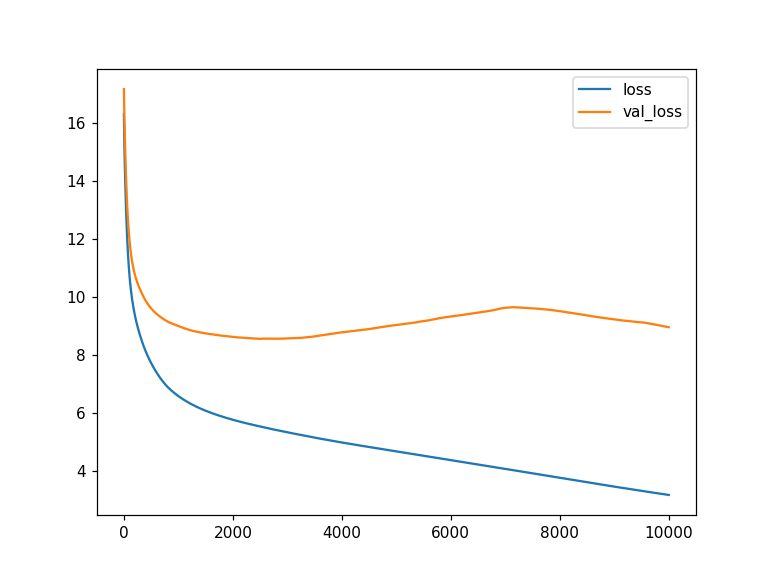

In [18]:
plt.figure()
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()
#plt.savefig('loss.jpg')

In [19]:
#模型训练结束后，预测是基于最终的一组参数，但可能效果最好的参数是前面的某一组，这里读取效果最好的参数进行预测
model.load_weights(checkpoint_save_path_transfer_free)
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

0.17395844 0.31290776
-0.027283685 0.11891915
0.4376273 0.10317


In [20]:
y_train_predict = model.predict(x_train)
y_train_predict = np.array(y_train_predict).flatten()
y_test_predict = model.predict(x_test)
y_test_predict = np.array(y_test_predict).flatten()
# print(y_train.shape)
# print(y_train_predict)

<IPython.core.display.Javascript object>


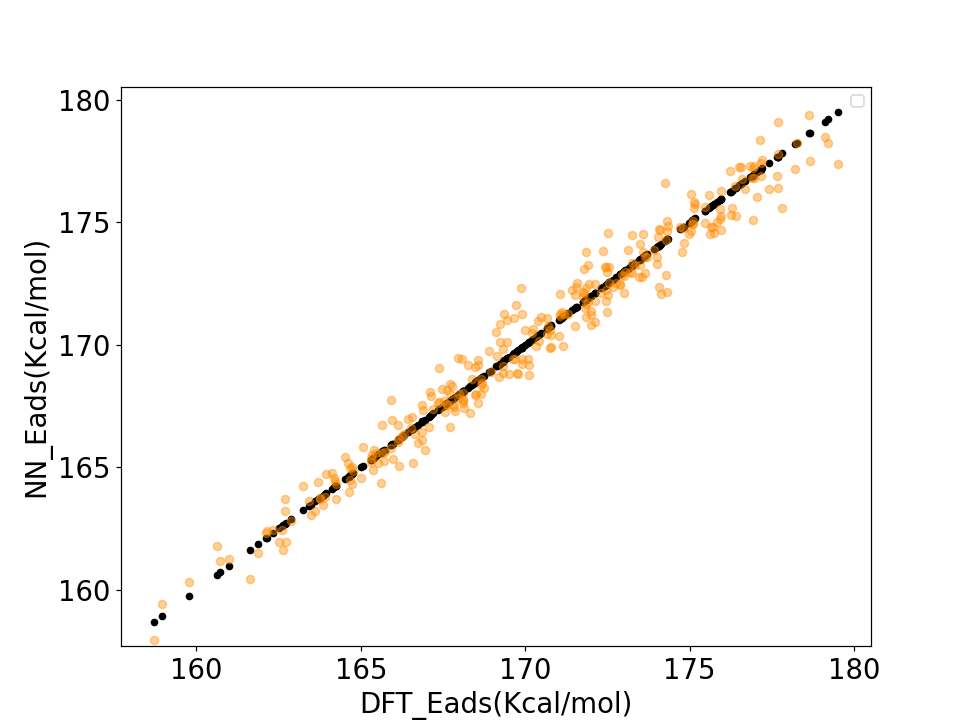

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [21]:
plt.figure(figsize=(8,6))
scale = 1
plt.xlim(min(y_train)-scale,max(y_train)+scale)
plt.ylim(min(y_train)-scale,max(y_train)+scale)

plt.scatter(y_train,y_train, color='black', s=16
#             ,linestyle='dotted'
#             ,label='DFT'
           )
plt.scatter(y_train, y_train_predict, s=28, alpha=0.4,color='darkorange'
#             ,label='NN_transform'
           )

plt.xlabel('DFT_Eads(Kcal/mol)',fontsize=18)
plt.ylabel('NN_Eads(Kcal/mol)',fontsize=18)

x1 = np.arange(min(y_train),max(y_train),0.5)
# plt.plot(x1,x1-3.6,label='y=x-3.6')
plt.legend()

plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.legend()
plt.savefig('./Fe-C-O_angel_train.png')

<IPython.core.display.Javascript object>


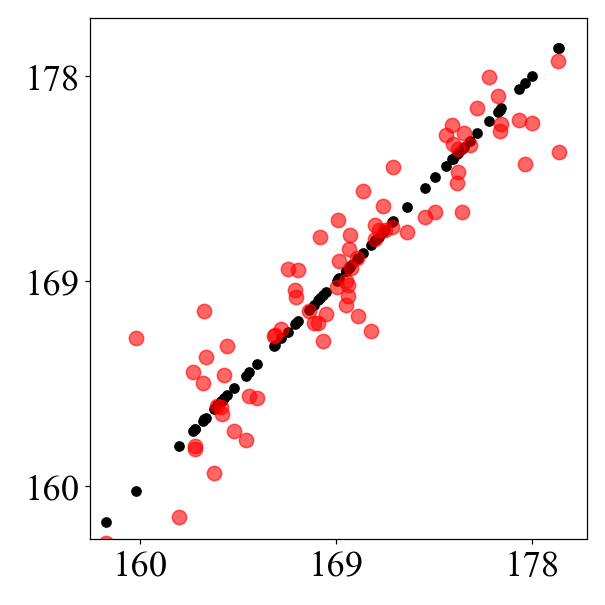

In [22]:
plt.figure(num=3,figsize=(5,5))
plt.rc('font',family='Times New Roman') 
scale = 1
plt.xlim(min(y_train)-scale,max(y_train)+scale)
plt.ylim(min(y_train)-scale,max(y_train)+scale)


plt.scatter(y_test,y_test, color='black', s=36
#             ,linestyle='dotted'
#             ,label='DFT'
           )
plt.scatter(y_test,y_test_predict, s=88, alpha=0.6,color='red'
#             ,label='NN_transform'
           )

# plt.xlabel('DFT_Eads(Kcal/mol)',fontsize=18)
# plt.ylabel('NN_Eads(Kcal/mol)',fontsize=18)

x1 = np.arange(min(y_test),max(y_test),0.5)
# plt.plot(x1,x1-3.6,label='y=x-3.6')

plt.xticks(np.arange(160,181,9),fontsize=24,rotation=0)
plt.yticks(np.arange(160,181,9),fontsize=24)
# plt.legend()
plt.tight_layout()
plt.savefig('./Fe-C-O_angel_test.png', dpi=168, bbox_inches='tight')

In [23]:
print("训练集------MAE: ",sm.mean_absolute_error(y_train,y_train_predict))
print("测试集------MAE: ",sm.mean_absolute_error(y_test,y_test_predict))
print("训练集------MSE: ",sm.mean_squared_error(y_train,y_train_predict))
print("测试集------MSE: ",sm.mean_squared_error(y_test,y_test_predict))
print("训练集------RMSE: ",np.sqrt(sm.mean_squared_error(y_train,y_train_predict)))
print("测试集------RMSE:: ",np.sqrt(sm.mean_squared_error(y_test,y_test_predict)))
print("训练集------R2_score: ",sm.r2_score(y_train,y_train_predict))
print("测试集------R2_score:: ",sm.r2_score(y_test,y_test_predict))

训练集------MAE:  0.6185792439648444
测试集------MAE:  1.4523795321484356
训练集------MSE:  0.6204643246934772
测试集------MSE:  3.6303101075847923
训练集------RMSE:  0.7876955786936202
测试集------RMSE::  1.9053372687229924
训练集------R2_score:  0.9693604877959473
测试集------R2_score::  0.8499564701891091
